## 数据科学之路~
<img src="1.jpg" alt="FAO" width="390" align="right">

### （一）数据领域的兄弟们的自身情况

* 性别比例
* 调查问卷国家分布
* 年龄分布
* 收入情况
* 所学专业
* 从事领域
* 工作满意度
* 最常使用工具
* 常用算法
* 计算平台选择
* 面临挑战

### （二）Python和R哪家强

<img src="2.jpg" alt="FAO" width="290" align="right">
* 使用人数
* 常用工具
* 不同工种偏好
* 各大领域使用趋势
* 薪资待遇
* 用了多少年
* 重要程度

### （三）数据科学家都在用什么

* 国家分布
* 使用Python or R
* 工资与学历
* 如何证明自己呢
* 遇到的问题
* 对可视化的重要程度
* 求职的途径
* 前一份工作和现在的对比

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
import numpy as np
# pip install plotly
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import base64
import io
# pip install scipy
# from scipy.misc import imread
import codecs
from IPython.display import HTML

### 先来看看数据是什么样子

In [9]:
response=pd.read_csv('multipleChoiceResponses.csv',encoding='ISO-8859-1')
response.head()

GenderSelect        Country   Age  \
0  Non-binary, genderqueer, or gender non-conforming            NaN   NaN   
1                                             Female  United States  30.0   
2                                               Male         Canada  28.0   
3                                               Male  United States  56.0   
4                                               Male         Taiwan  38.0   

                                    EmploymentStatus StudentStatus  \
0                                 Employed full-time           NaN   
1                 Not employed, but looking for work           NaN   
2                 Not employed, but looking for work           NaN   
3  Independent contractor, freelancer, or self-em...           NaN   
4                                 Employed full-time           NaN   

  LearningDataScience CodeWriter CareerSwitcher  \
0                 NaN        Yes            NaN   
1                 NaN        NaN            NaN   
2                 NaN        NaN            NaN   
3                 NaN        Yes            NaN   
4                 NaN        Yes            NaN   

              CurrentJobTitleSelect TitleFit  ... JobFactorExperienceLevel  \
0             DBA/Database Engineer     Fine  ...                      NaN   
1                               NaN      NaN  ...                      NaN   
2                               NaN      NaN  ...           Very Important   
3  Operations Research Practitioner   Poorly  ...                      NaN   
4                Computer Scientist     Fine  ...                      NaN   

  JobFactorDepartment  JobFactorTitle JobFactorCompanyFunding JobFactorImpact  \
0                 NaN             NaN                     NaN             NaN   
1                 NaN             NaN                     NaN             NaN   
2      Very Important  Very Important          Very Important  Very Important   
3                 NaN             NaN                     NaN             NaN   
4                 NaN             NaN                     NaN             NaN   

  JobFactorRemote JobFactorIndustry JobFactorLeaderReputation  \
0             NaN               NaN                       NaN   
1             NaN               NaN        Somewhat important   
2  Very Important    Very Important            Very Important   
3             NaN               NaN                       NaN   
4             NaN               NaN                       NaN   

  JobFactorDiversity JobFactorPublishingOpportunity  
0                NaN                            NaN  
1                NaN                            NaN  
2     Very Important                 Very Important  
3                NaN                            NaN  
4                NaN                            NaN  

[5 rows x 228 columns]

来看看整体吧，一共有多少个国家的兄弟们加入了调查，最多的是哪个国家？最小几岁？最大又是几岁呢？

In [10]:
print('调查对象总数',response.shape[0])
print('一共多少个国家参与了调查:',response['Country'].nunique())
print('参与人数最多的国家是',response['Country'].value_counts().index[0],'人数',response['Country'].value_counts().values[0])
print('最小的选手:',response['Age'].min(),' 最大的选手:',response['Age'].max())

调查对象总数 16716
一共多少个国家参与了调查: 52
参与人数最多的国家是 United States 人数 4197
最小的选手: 0.0  最大的选手: 100.0


0岁就开始，还有干到100岁的，有些内容是可信，有些内容不可信。还需要自行判断

### 看看性别的分布

In [58]:
response['GenderSelect'].value_counts().values[:],response['GenderSelect'].value_counts().index

(array([13610,  2778,   159,    74], dtype=int64),
 Index(['Male', 'Female', 'A different identity',
        'Non-binary, genderqueer, or gender non-conforming'],
       dtype='object'))

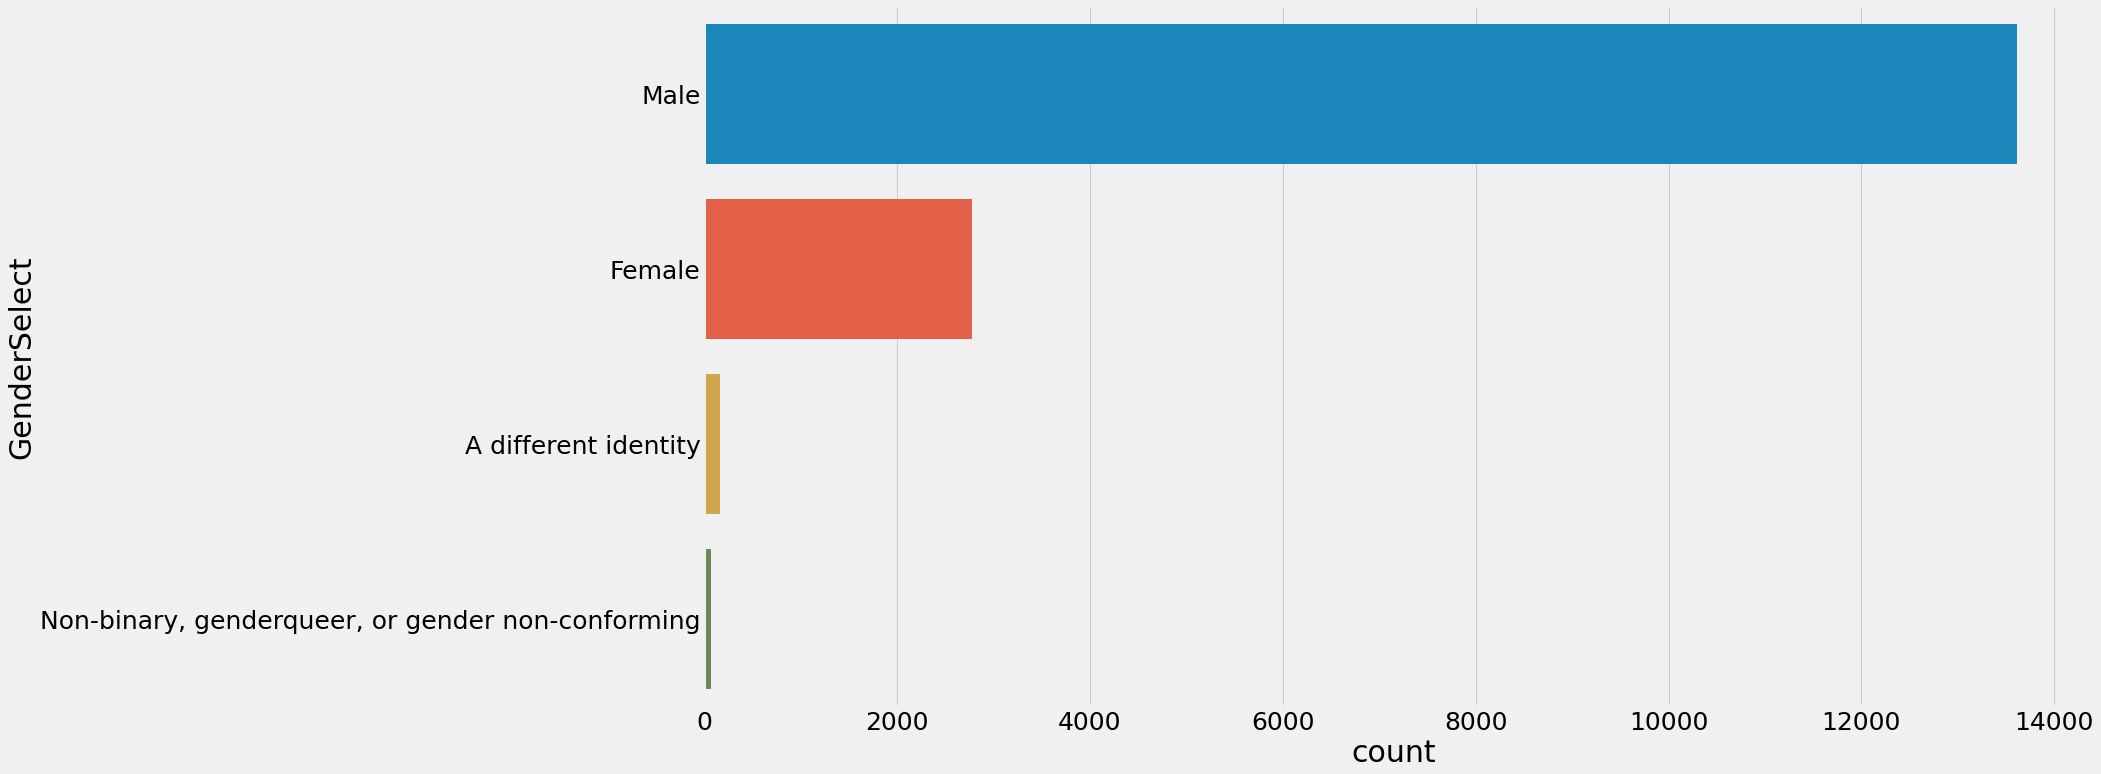

In [42]:
import matplotlib
# 设置字体大小
matplotlib.rcParams.update({'font.size': 25})
plt.subplots(figsize=(22,12))
ax = sns.countplot(y=response['GenderSelect'],order=response['GenderSelect'].value_counts().index)
plt.show()

男性比例，还是很高的。

Non-binary，双性；genderqueer，中性，

### 看看参与调查人数最多的前15个国家

In [67]:
response['Country'].value_counts()[:15].to_frame()

Country
United States                   4197
India                           2704
Other                           1023
Russia                           578
United Kingdom                   535
People 's Republic of China      471
Brazil                           465
Germany                          460
France                           442
Canada                           440
Australia                        421
Spain                            320
Japan                            277
Taiwan                           254
Italy                            238

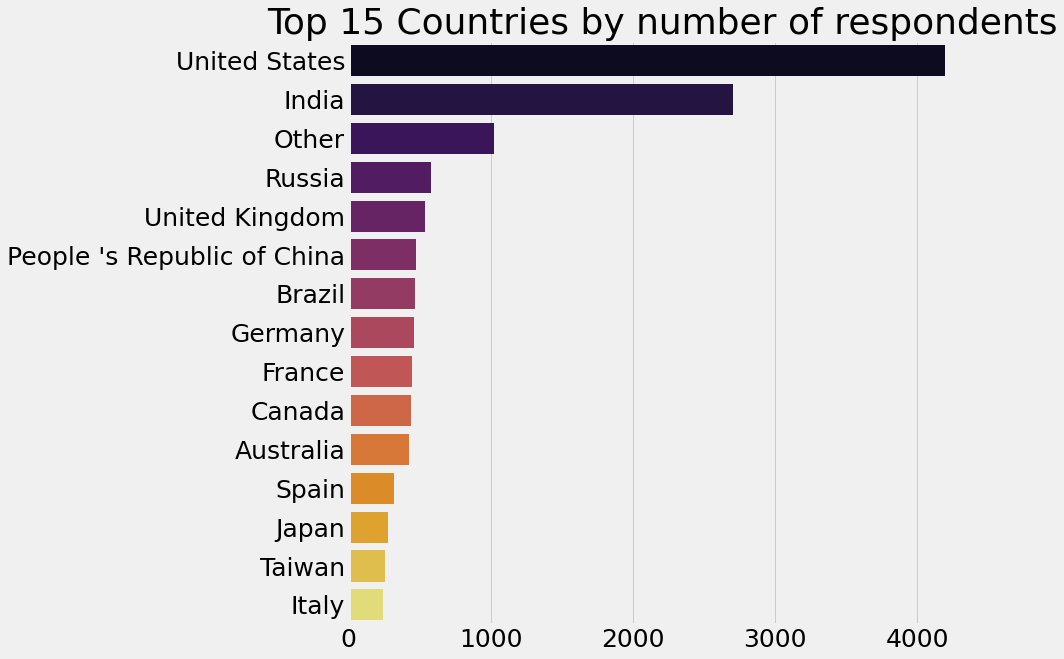

In [43]:
resp_coun=response['Country'].value_counts()[:15].to_frame()
sns.barplot(resp_coun['Country'],resp_coun.index,palette='inferno')
plt.title('Top 15 Countries by number of respondents')
plt.xlabel('')
fig=plt.gcf()#获取当前图表对象
fig.set_size_inches(10,10)#设置尺寸大小
plt.show()

### 调查问卷中，各国的收入情况都如何？

In [44]:
# 有些收入的写法比较特别,清除特殊符号
response['CompensationAmount']=response['CompensationAmount'].str.replace(',','')
response['CompensationAmount']=response['CompensationAmount'].str.replace('-','')
# 加入汇率表，后面要统一货币类型
rates=pd.read_csv('conversionRates.csv')
rates.head()

Unnamed: 0 originCountry  exchangeRate
0           1           USD      1.000000
1           2           EUR      1.195826
2           3           INR      0.015620
3           4           GBP      1.324188
4           5           BRL      0.321350

In [45]:
rates.drop('Unnamed: 0',axis=1,inplace=True)
salary=response[['CompensationAmount','CompensationCurrency','GenderSelect','Country','CurrentJobTitleSelect']].dropna()
salary.head()

CompensationAmount CompensationCurrency GenderSelect        Country  \
3              250000                  USD         Male  United States   
8               80000                  AUD       Female      Australia   
9             1200000                  RUB         Male         Russia   
11              95000                  INR         Male          India   
14            1100000                  TWD         Male         Taiwan   

                   CurrentJobTitleSelect  
3       Operations Research Practitioner  
8                       Business Analyst  
9   Software Developer/Software Engineer  
11                        Data Scientist  
14  Software Developer/Software Engineer

In [71]:
# 统一按美元计算工资
salary=salary.merge(rates,left_on='CompensationCurrency',right_on='originCountry',how='left')
salary.head()

CompensationAmount CompensationCurrency GenderSelect        Country  \
0             250000                  USD         Male  United States   
1              80000                  AUD       Female      Australia   
2            1200000                  RUB         Male         Russia   
3              95000                  INR         Male          India   
4            1100000                  TWD         Male         Taiwan   

                  CurrentJobTitleSelect originCountry_x  exchangeRate_x  \
0      Operations Research Practitioner             USD        1.000000   
1                      Business Analyst             AUD        0.802310   
2  Software Developer/Software Engineer             RUB        0.017402   
3                        Data Scientist             INR        0.015620   
4  Software Developer/Software Engineer             TWD        0.033304   

     Salary originCountry_y  exchangeRate_y  
0  250000.0             USD        1.000000  
1   64184.8             AUD        0.802310  
2   20882.4             RUB        0.017402  
3    1483.9             INR        0.015620  
4   36634.4             TWD        0.033304

In [47]:
salary['Salary']=pd.to_numeric(salary['CompensationAmount'])*salary['exchangeRate']
print('Maximum Salary is USD $',salary['Salary'].dropna().astype(int).max())
print('Minimum Salary is USD $',salary['Salary'].dropna().astype(int).min())
print('Median Salary is USD $',salary['Salary'].dropna().astype(int).median())

Maximum Salary is USD $ 208999999
Minimum Salary is USD $ -2147483648
Median Salary is USD $ 53812.0


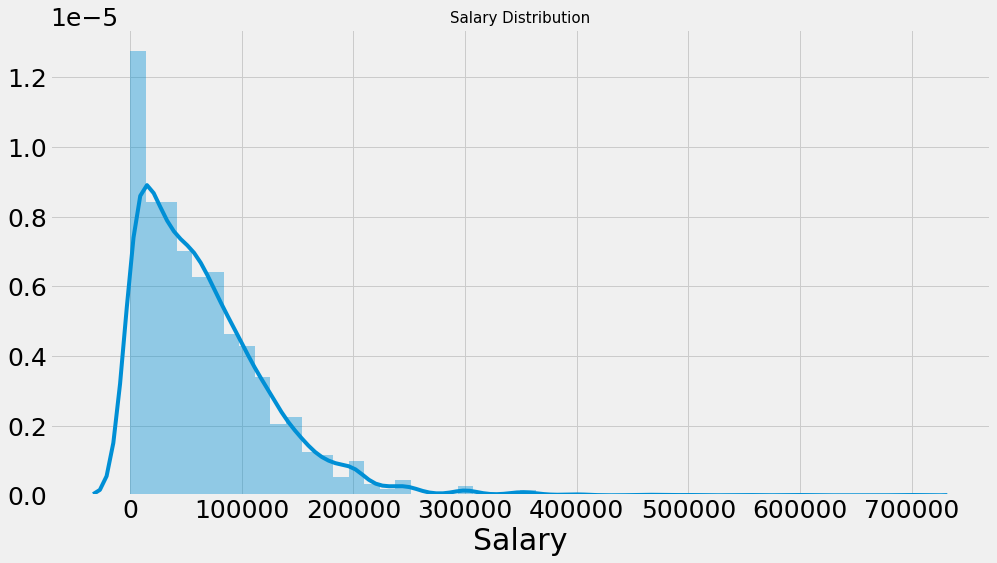

In [78]:
plt.subplots(figsize=(15,8))
# 去除部分不靠谱的数据
salary = salary[salary['Salary']<1000000]
sns.distplot(salary['Salary'])
plt.title('Salary Distribution',size=15)
plt.show()

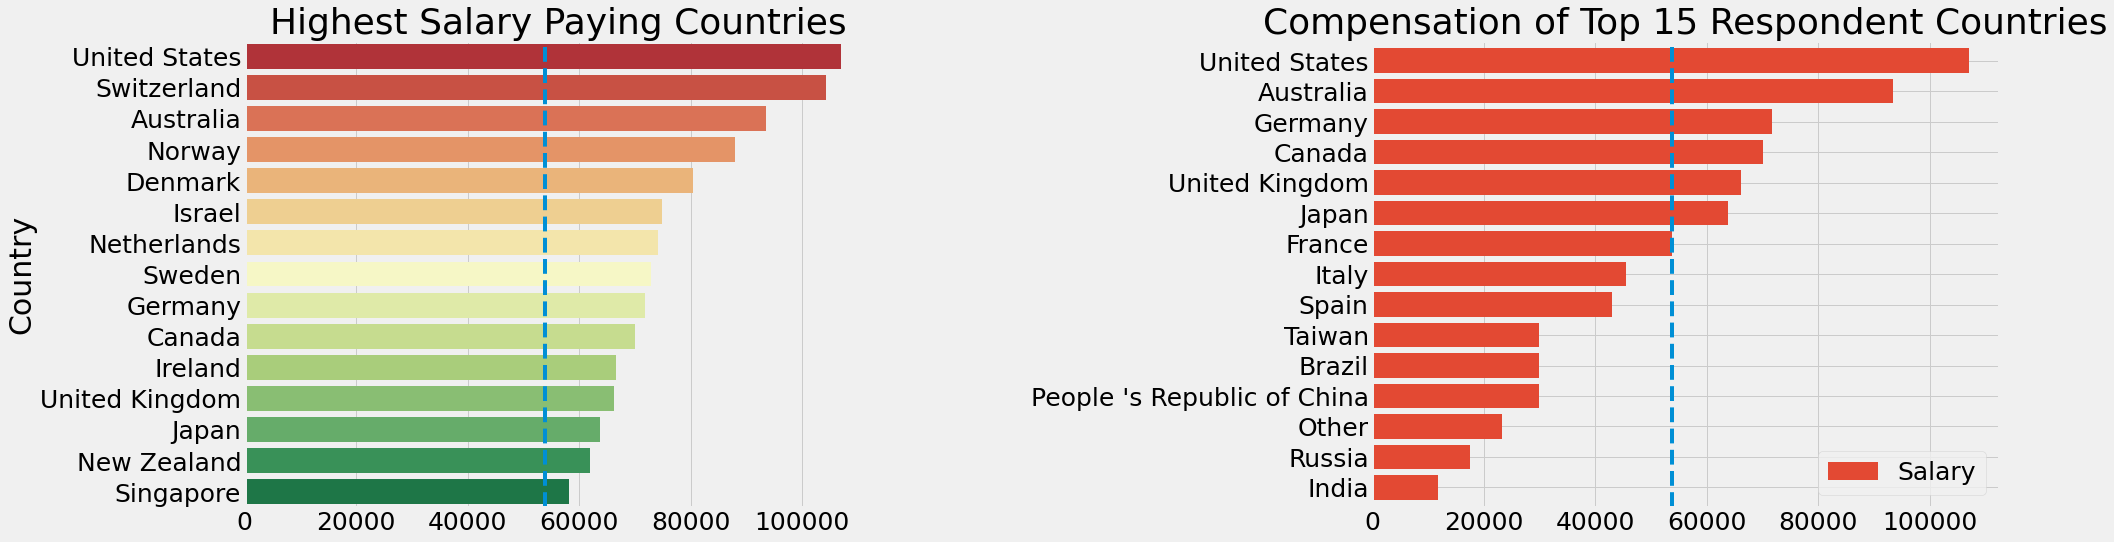

                     Salary
Country                    
United States   107000.0000
Switzerland     104338.2000
Australia        93469.1150
Norway           87875.4000
Denmark          80365.0000
Israel           74852.5680
Netherlands      74141.2120
Sweden           72803.4480
Germany          71749.5600
Canada           70013.4800
Ireland          66667.2995
United Kingdom   66209.4000
Japan            63756.0000
New Zealand      61863.0850
Singapore        58144.7187
                                 Salary
Country                                
United States                107000.000
Australia                     93469.115
Germany                       71749.560
Canada                        70013.480
United Kingdom                66209.400
Japan                         63756.000
France                        53812.170
Italy                         45441.388
Spain                         43049.736
Brazil                        30000.000
Taiwan                        30000.000
Peop

In [65]:
f,ax=plt.subplots(1,2,figsize=(28,8))
# 以国家为key，看一下工资的中位值
sal_coun=salary.groupby('Country')['Salary'].median().sort_values(ascending=False)[:15].to_frame()
sns.barplot('Salary',sal_coun.index,data=sal_coun,palette='RdYlGn',ax=ax[0])
# 整体的均值
ax[0].axvline(salary['Salary'].median(),linestyle='dashed')
ax[0].set_title('Highest Salary Paying Countries')
ax[0].set_xlabel('')
# 填写问卷的国家，排序，工资情况
max_coun=salary.groupby('Country')['Salary'].median().to_frame()
max_coun=max_coun[max_coun.index.isin(resp_coun.index)]
max_coun.sort_values(by='Salary',ascending=True).plot.barh(width=0.8,ax=ax[1],color=sns.color_palette('RdYlGn'))
ax[1].axvline(salary['Salary'].median(),linestyle='dashed')
ax[1].set_title('Compensation of Top 15 Respondent Countries')
ax[1].set_xlabel('')
ax[1].set_ylabel('')
plt.subplots_adjust(wspace=0.8)
plt.show()
print(sal_coun)
print(max_coun.sort_values(by='Salary',ascending=False))

竖条的那个是整体的中位数，左边的图中工资排名前15的国家都超过中位数了，右边的图是参与人数最多的15个国家的情况，中国的薪资还是有点低啊

### 性别对工资的影响大吗？

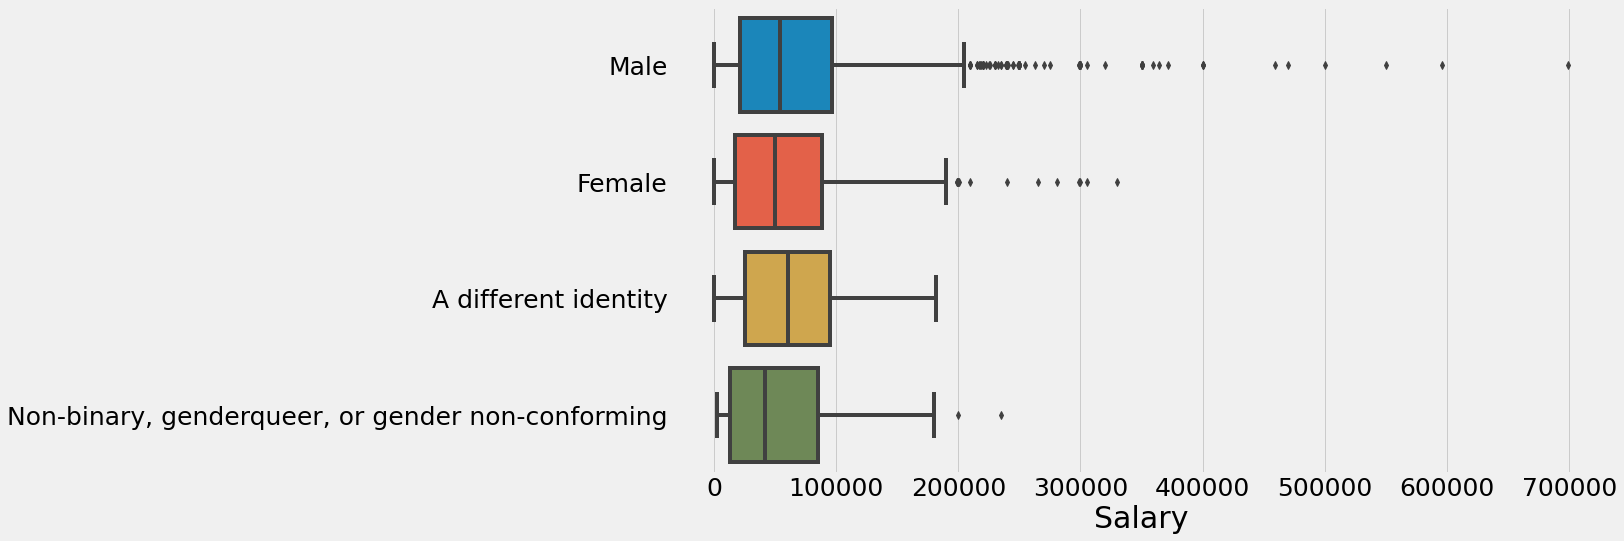

In [70]:
plt.subplots(figsize=(15,8))
sns.boxplot(y='GenderSelect',x='Salary',data=salary)
plt.ylabel('')
plt.show()

男性稍高一点点

### 参与调查的人的年龄分布

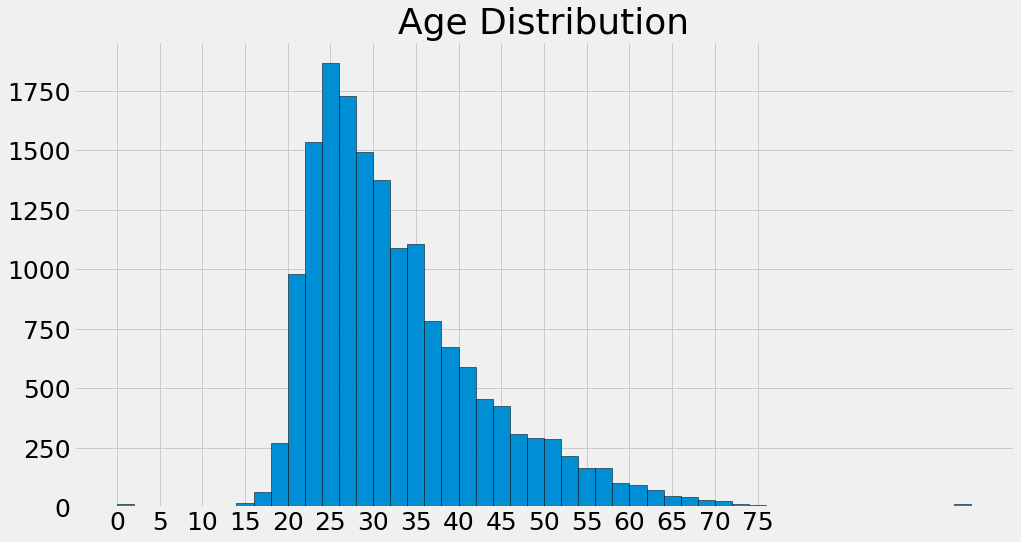

In [51]:
plt.subplots(figsize=(15,8))
response['Age'].hist(bins=50,edgecolor='black')
plt.xticks(list(range(0,80,5)))
plt.title('Age Distribution')
plt.show() 

## 使用数据的人都是什么专业？做什么工作？

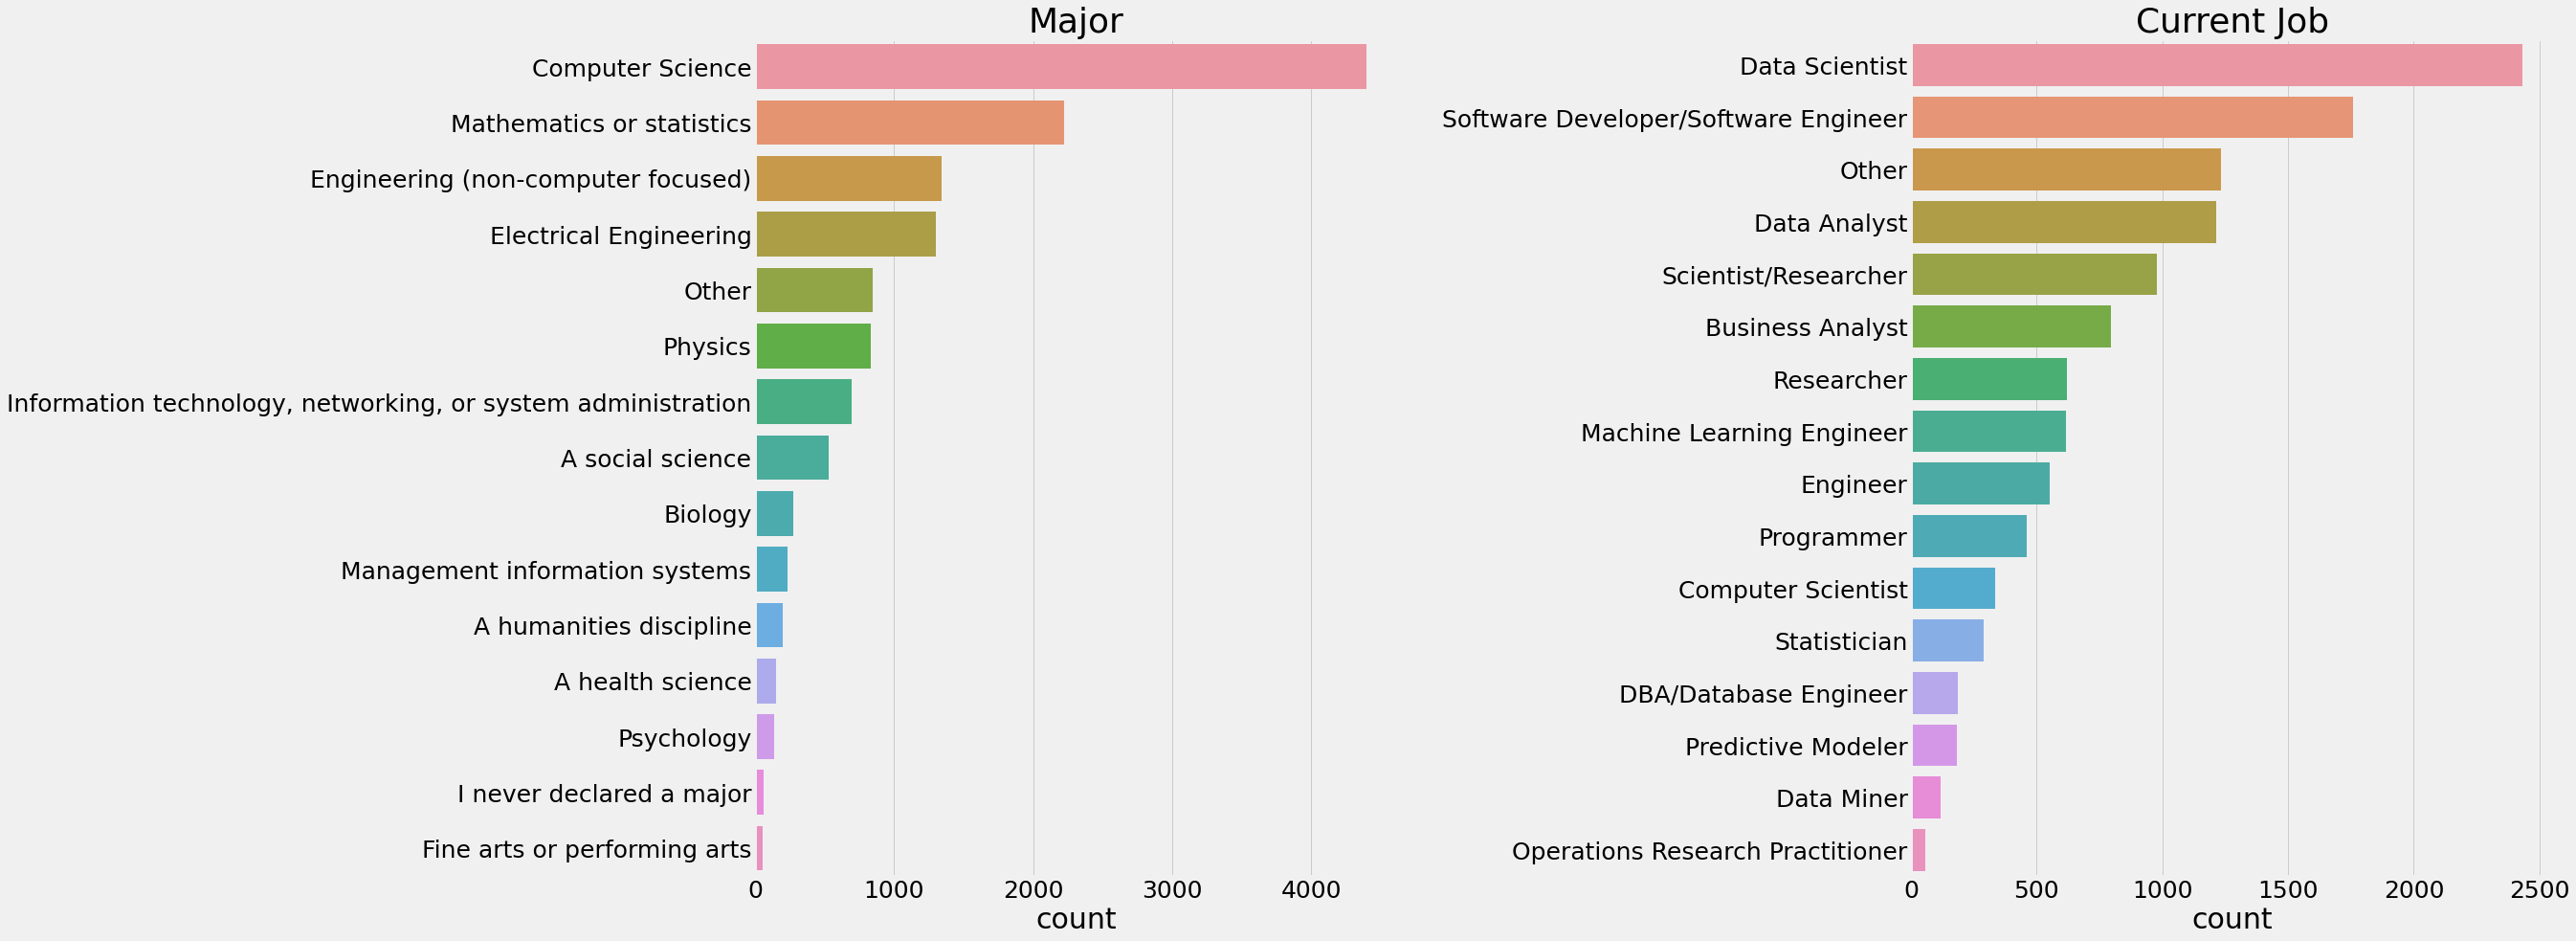

In [52]:
f,ax=plt.subplots(1,2,figsize=(30,15))
sns.countplot(y=response['MajorSelect'],ax=ax[0],order=response['MajorSelect'].value_counts().index)
ax[0].set_title('Major')
ax[0].set_ylabel('')
sns.countplot(y=response['CurrentJobTitleSelect'],ax=ax[1],order=response['CurrentJobTitleSelect'].value_counts().index)
ax[1].set_title('Current Job')
ax[1].set_ylabel('')
plt.subplots_adjust(wspace=0.8)
plt.show()

几乎所有行业都使用数据科学和机器学习。从左图中可以看出这一点，因为来自不同领域的人们，如物理、生物学等，正都在从事数据方面的研究。

右边的图表显示了被调查者当前的工作情况。最多的人是数据科学家

## 这些个不同工种的工资分布是什么样？

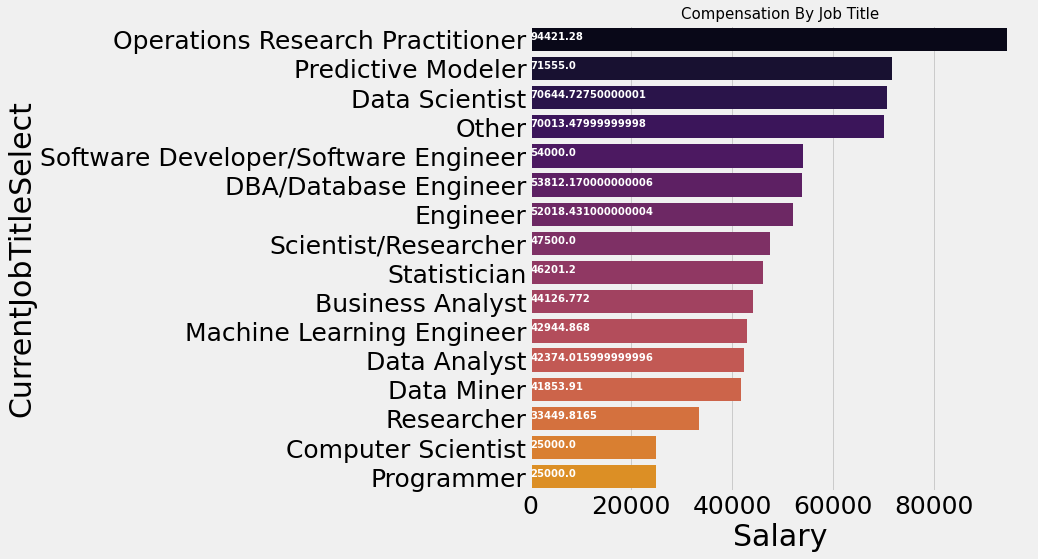

In [57]:
sal_job=salary.groupby('CurrentJobTitleSelect')['Salary'].median().to_frame().sort_values(by='Salary',ascending=False)
ax=sns.barplot(sal_job.Salary,sal_job.index,palette=sns.color_palette('inferno',20))
plt.title('Compensation By Job Title',size=15)
for i, v in enumerate(sal_job.Salary): 
    ax.text(100, i, v,fontsize=10,color='white',weight='bold')
fig=plt.gcf()
fig.set_size_inches(8,8)
plt.show()

运筹学从业者的平均工资中位数最高，其次是预测建模师和数据科学家。计算机科学家和程序员的报酬最低。

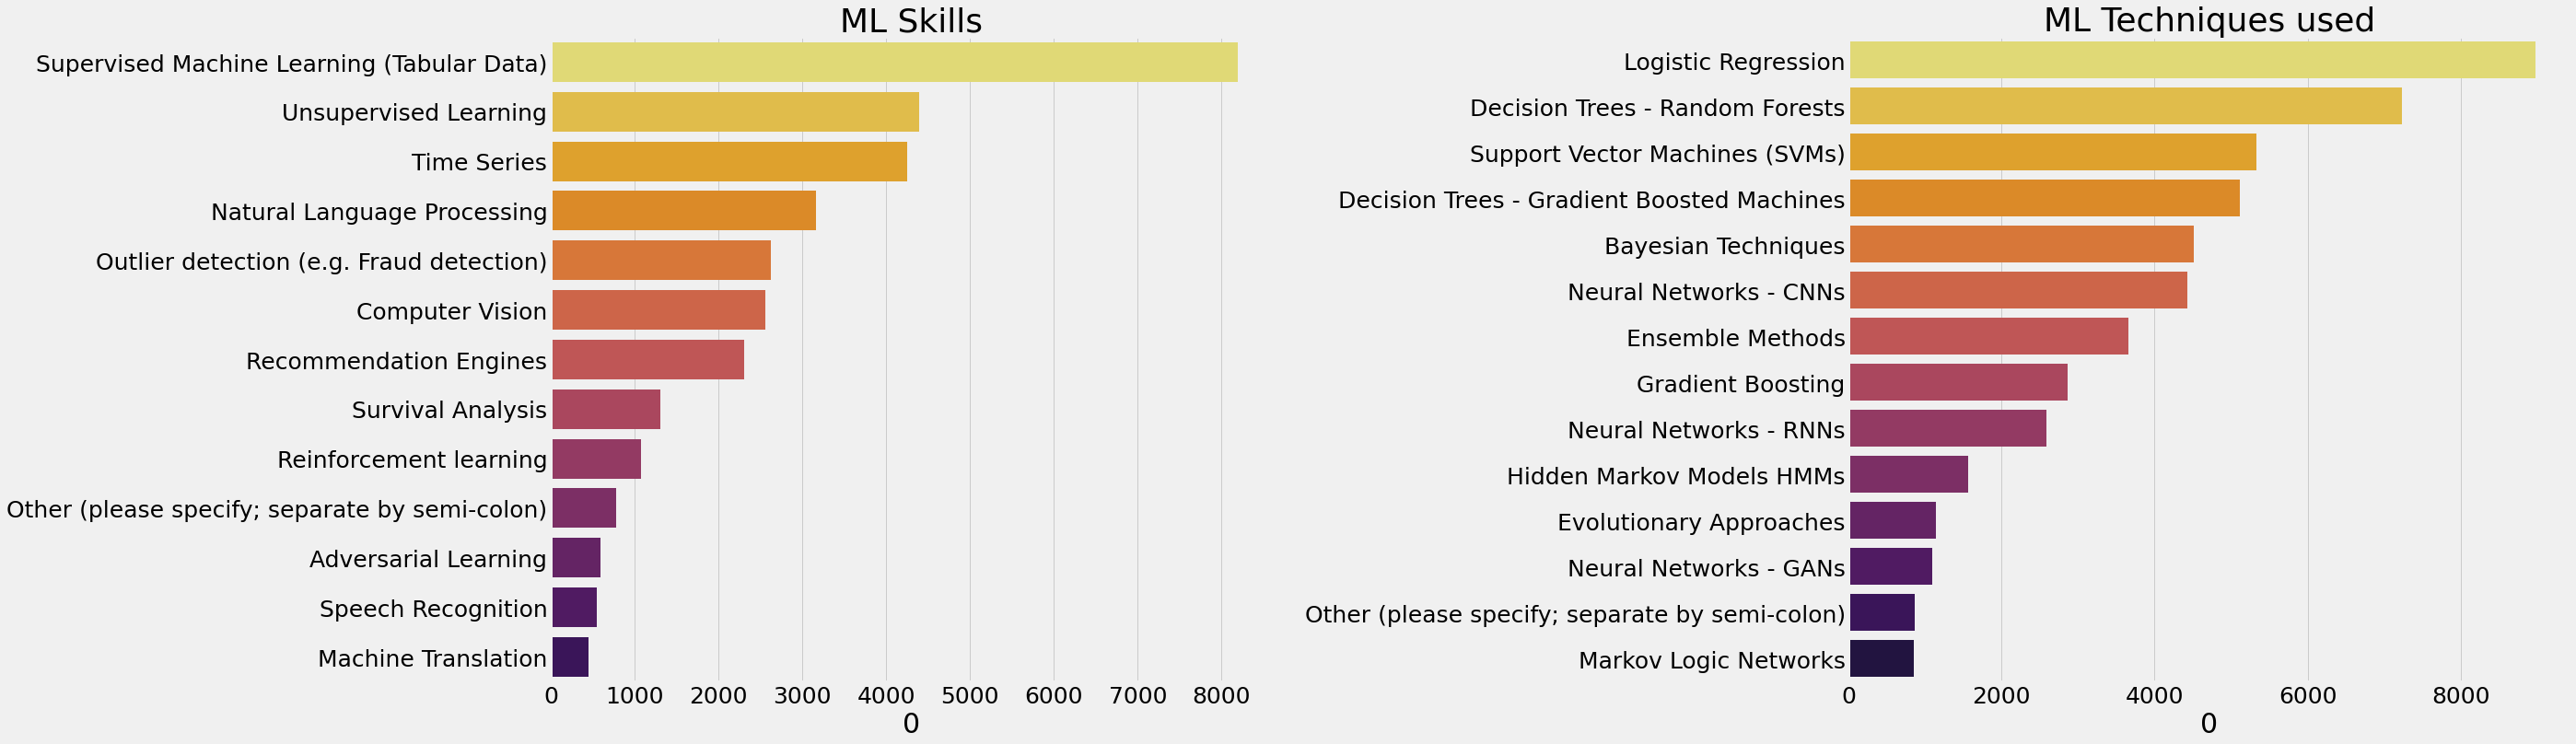

In [17]:
f,ax=plt.subplots(1,2,figsize=(35,12))
skills=response['MLSkillsSelect'].str.split(',')
skills_set=[]
for i in skills.dropna():
    skills_set.extend(i)
plt1=pd.Series(skills_set).value_counts().sort_values(ascending=False).to_frame()
sns.barplot(plt1[0],plt1.index,ax=ax[0],palette=sns.color_palette('inferno_r',15))
ax[0].set_title('ML Skills')
tech=response['MLTechniquesSelect'].str.split(',')
techniques=[]
for i in tech.dropna():
    techniques.extend(i)
plt1=pd.Series(techniques).value_counts().sort_values(ascending=False).to_frame()
sns.barplot(plt1[0],plt1.index,ax=ax[1],palette=sns.color_palette('inferno_r',15))
ax[1].set_title('ML Techniques used')
plt.subplots_adjust(wspace=0.8)
plt.show()

显然，大多数受调查者都从事有监督的学习，而逻辑回归是其中最受欢迎的，但是算法没有高下之分！

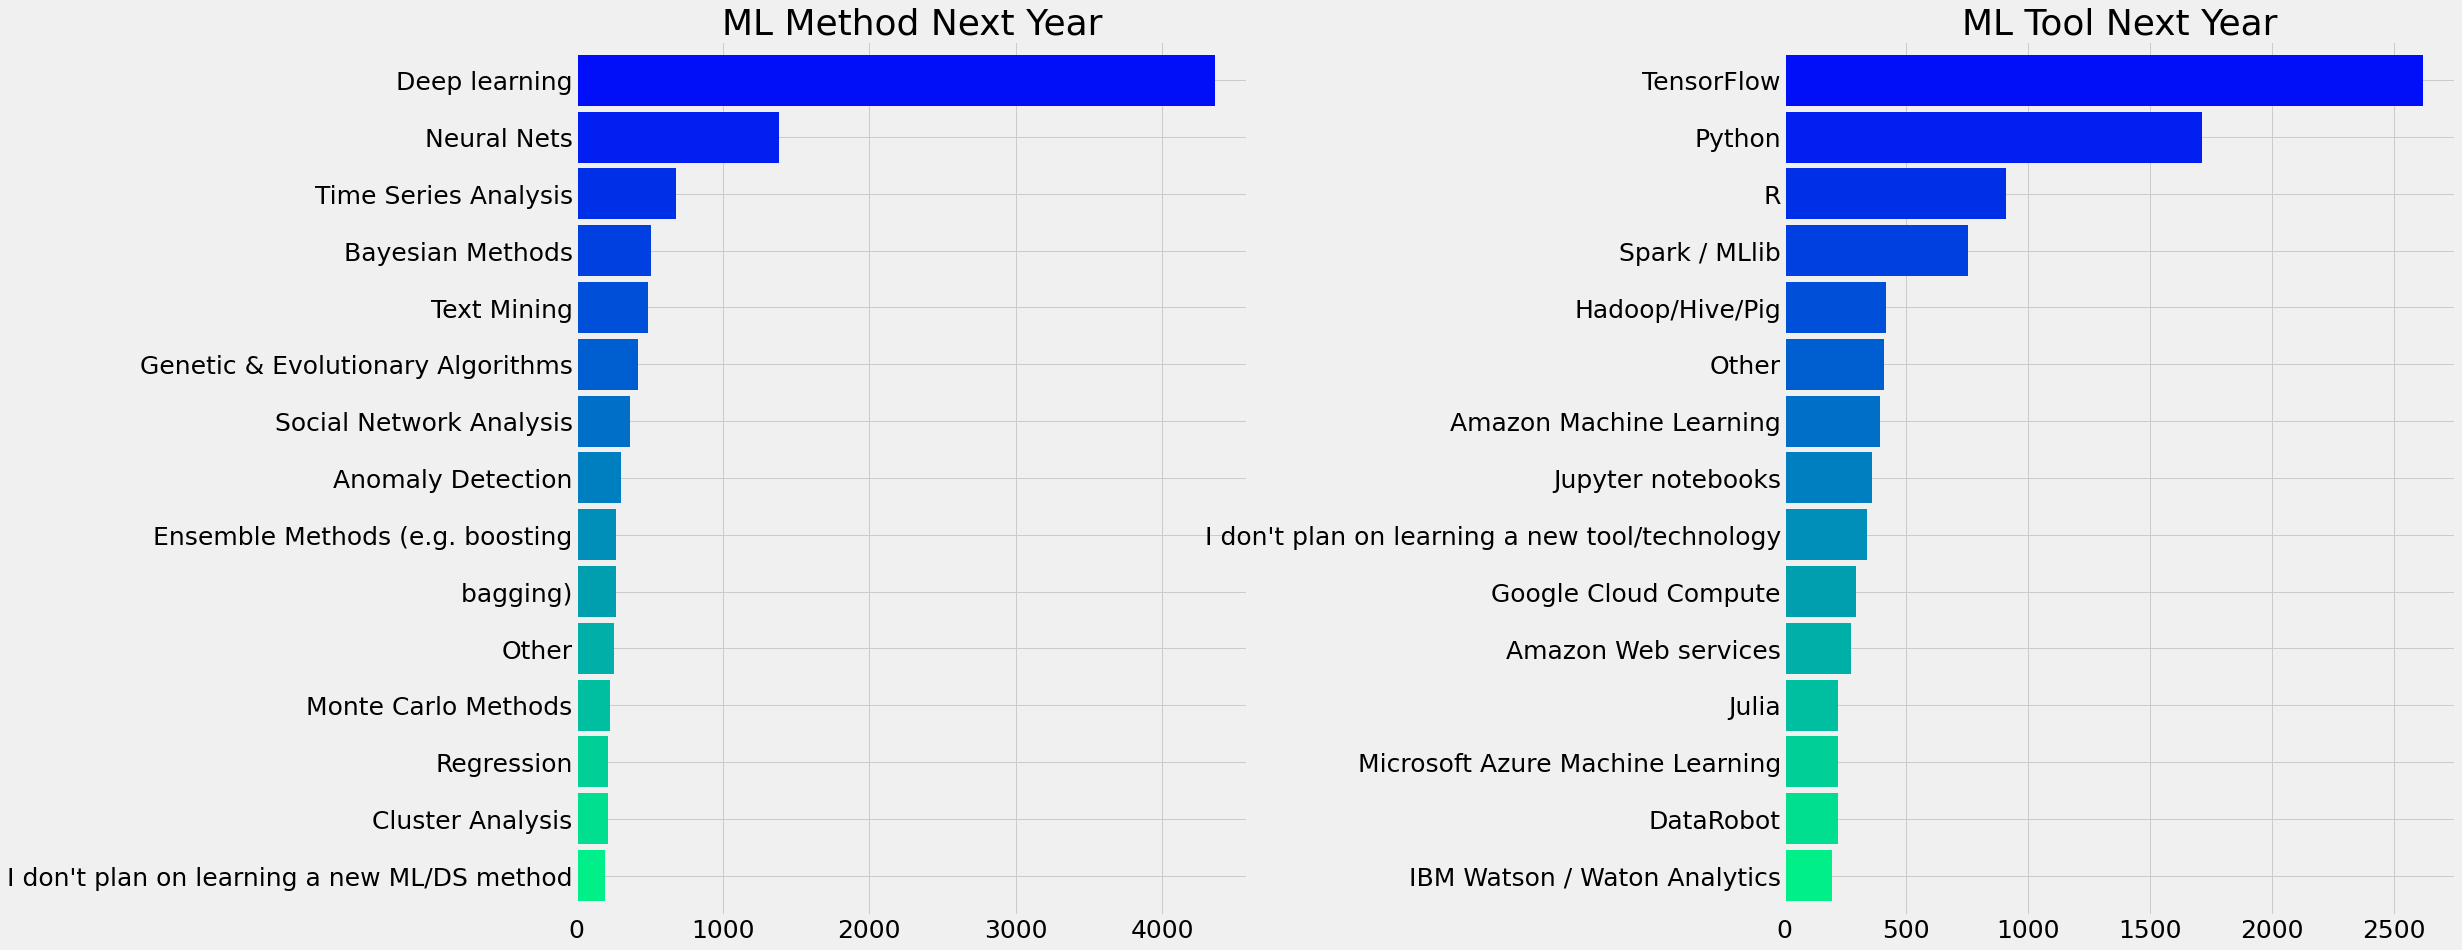

In [18]:
f,ax=plt.subplots(1,2,figsize=(30,15))
ml_nxt=response['MLMethodNextYearSelect'].str.split(',')
nxt_year=[]
for i in ml_nxt.dropna():
    nxt_year.extend(i)
pd.Series(nxt_year).value_counts()[:15].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('winter_r',15),ax=ax[0])
tool=response['MLToolNextYearSelect'].str.split(',')
tool_nxt=[]
for i in tool.dropna():
    tool_nxt.extend(i)
pd.Series(tool_nxt).value_counts()[:15].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('winter_r',15),ax=ax[1])
plt.subplots_adjust(wspace=0.8)
ax[0].set_title('ML Method Next Year')
ax[1].set_title('ML Tool Next Year')
plt.show()

很明显，下一年将会有更多的深度学习者。深度学习和神经网络，都是明年的热点。

此外，在工具方面，Python比R更受欢迎。

## 数据科学平台，大家喜欢哪一个？

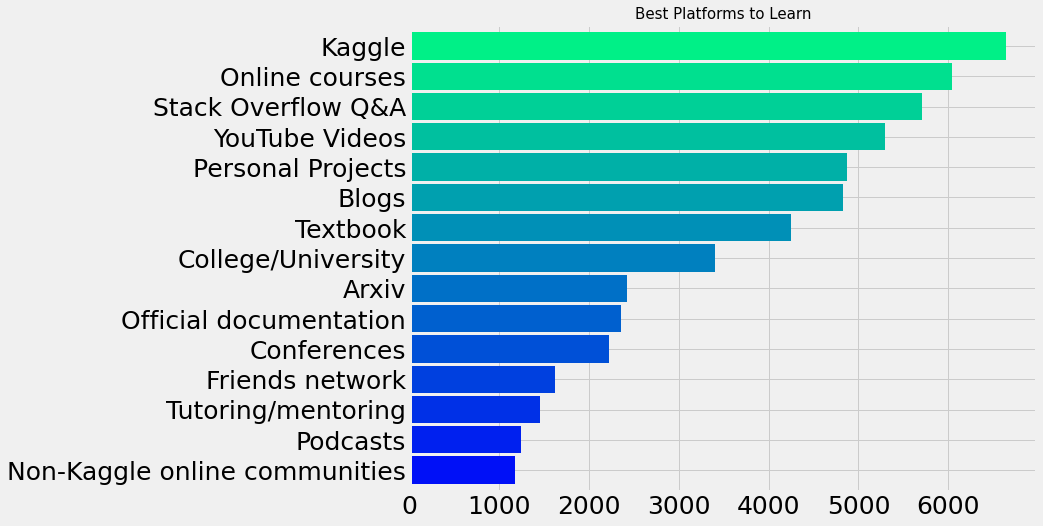

In [19]:
plt.subplots(figsize=(10,8))
learn=response['LearningPlatformSelect'].str.split(',')
platform=[]
for i in learn.dropna():
    platform.extend(i)
pd.Series(platform).value_counts()[:15].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('winter',15))
plt.title('Best Platforms to Learn',size=15)
plt.show()

kaggle是最受欢迎的平台

## 大家都用什么设备工作？

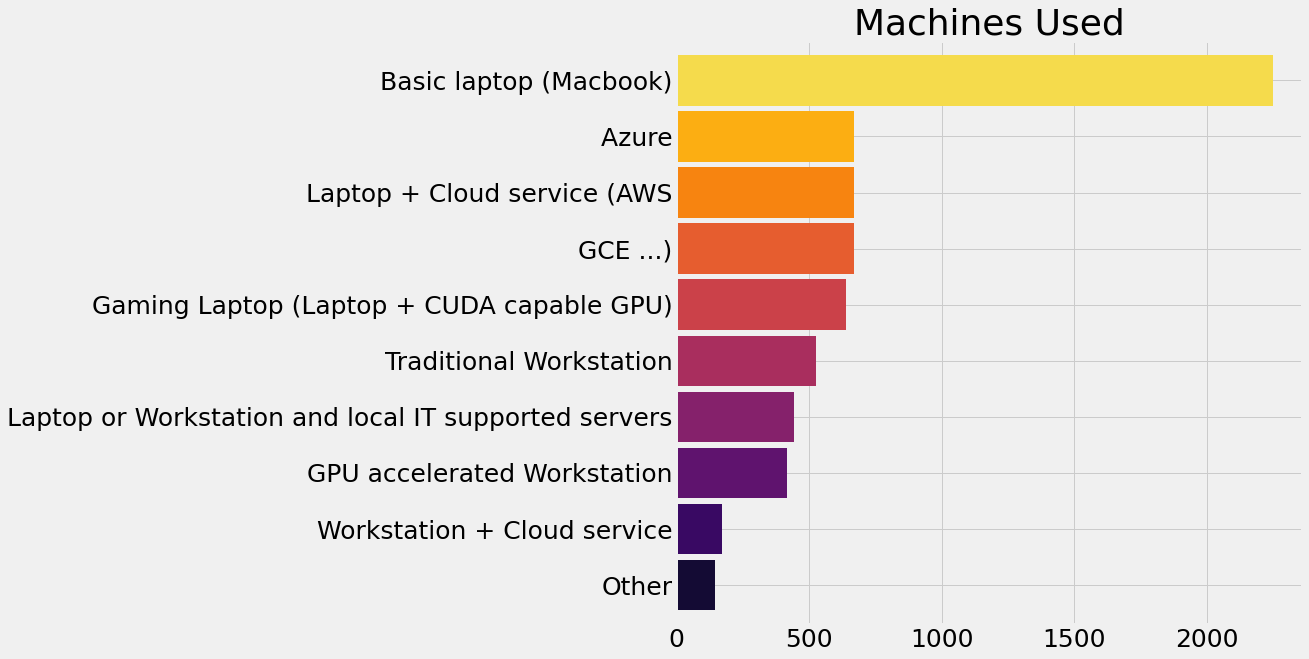

In [20]:
plt.subplots(figsize=(10,10))
hard=response['HardwarePersonalProjectsSelect'].str.split(',')
hardware=[]
for i in hard.dropna():
    hardware.extend(i)
pd.Series(hardware).value_counts().sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('inferno',10))
plt.title('Machines Used')
plt.show()

有些高配玩家，但是通常还是笔记本为主

## 数据集哪里找？

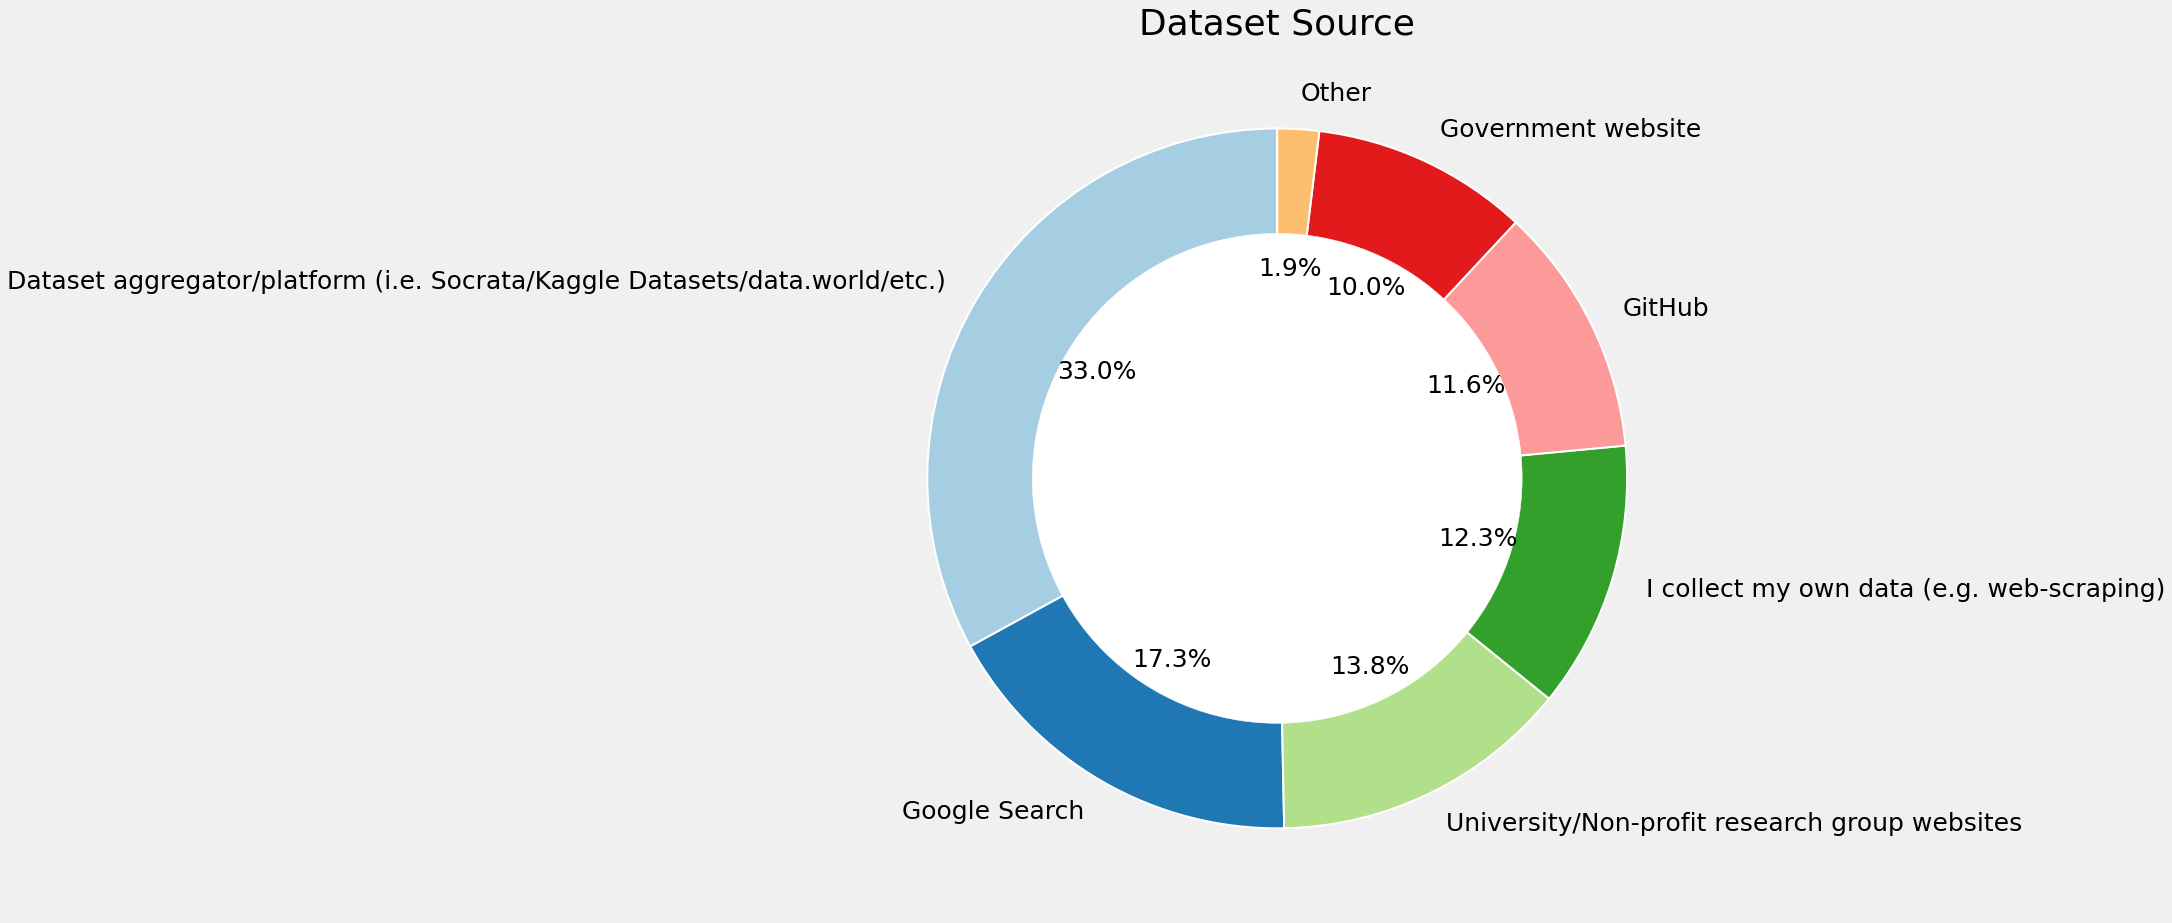

In [21]:
plt.subplots(figsize=(15,15))
data=response['PublicDatasetsSelect'].str.split(',')
dataset=[]
for i in data.dropna():
    dataset.extend(i)
pd.Series(dataset).value_counts().plot.pie(autopct='%1.1f%%',colors=sns.color_palette('Paired',10),startangle=90,wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' })
plt.title('Dataset Source')
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.ylabel('')
plt.show()

渠道多种多样，大家也可以参考。

## 开源的代码哪里找？

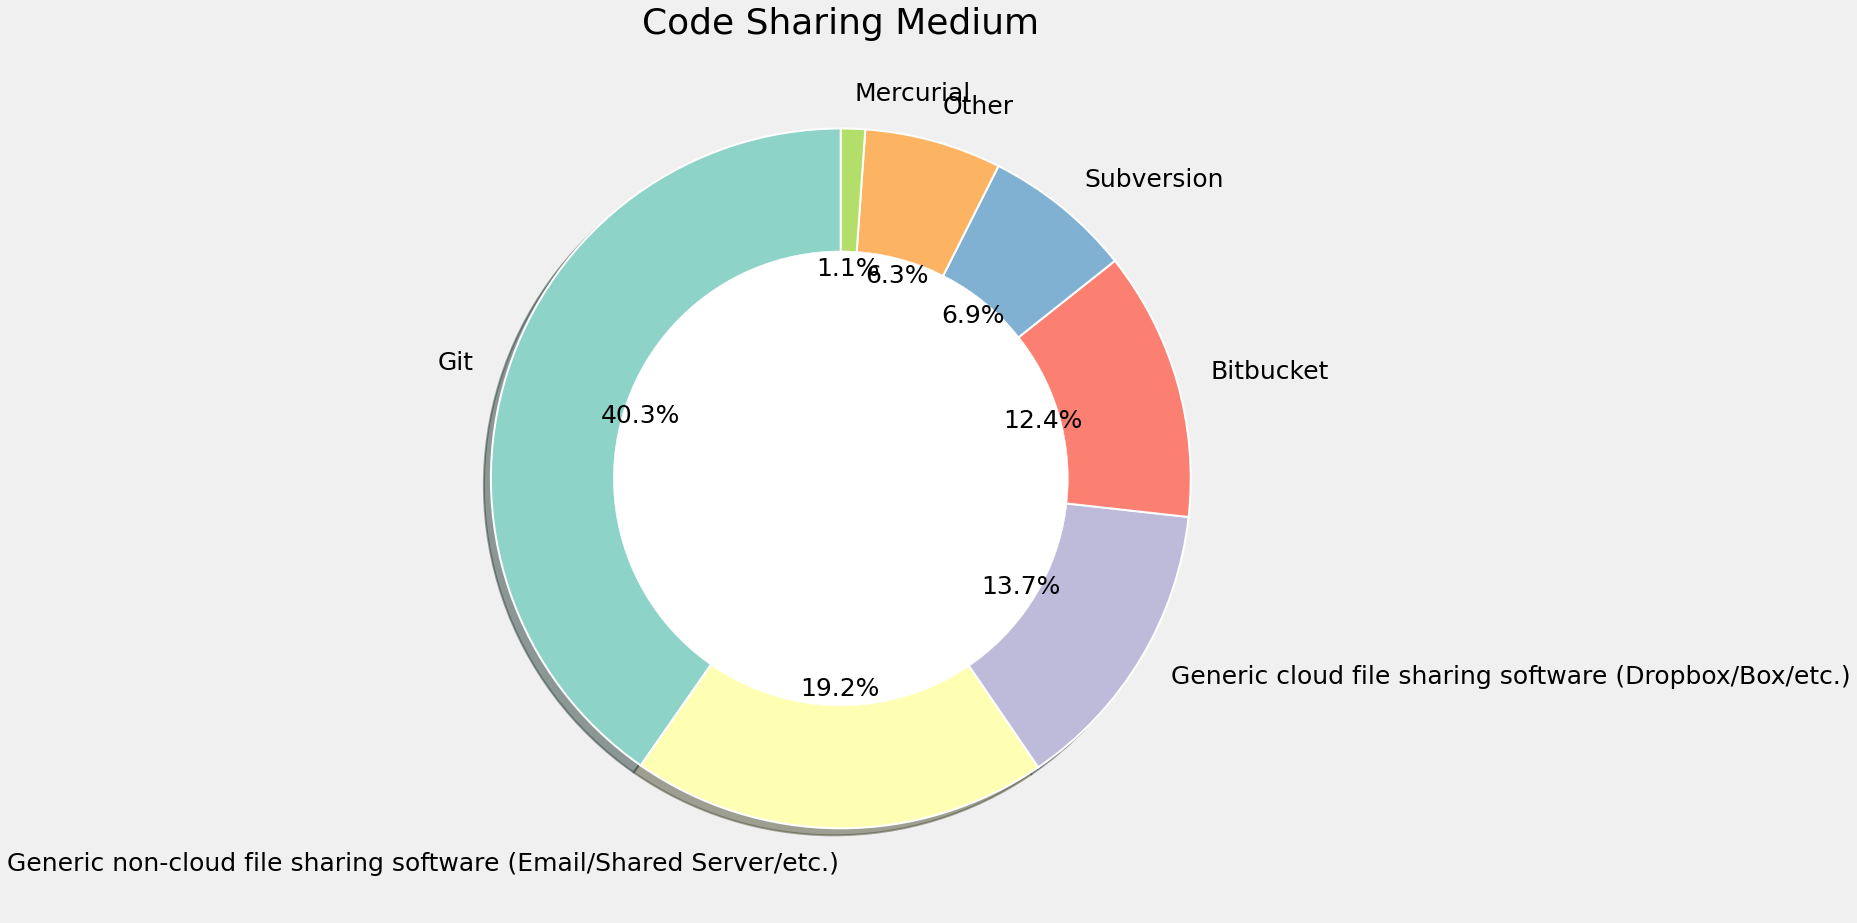

In [22]:
plt.subplots(figsize=(15,15))
code=response['WorkCodeSharing'].str.split(',')
code_share=[]
for i in code.dropna():
    code_share.extend(i)
pd.Series(code_share).value_counts().plot.pie(autopct='%1.1f%%',shadow=True,colors=sns.color_palette('Set3',10),startangle=90,wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' })
plt.title('Code Sharing Medium')
my_circle=plt.Circle( (0,0), 0.65, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.ylabel('')
plt.show()

github肯定是第一选择了！

## 数据科学面临的挑战

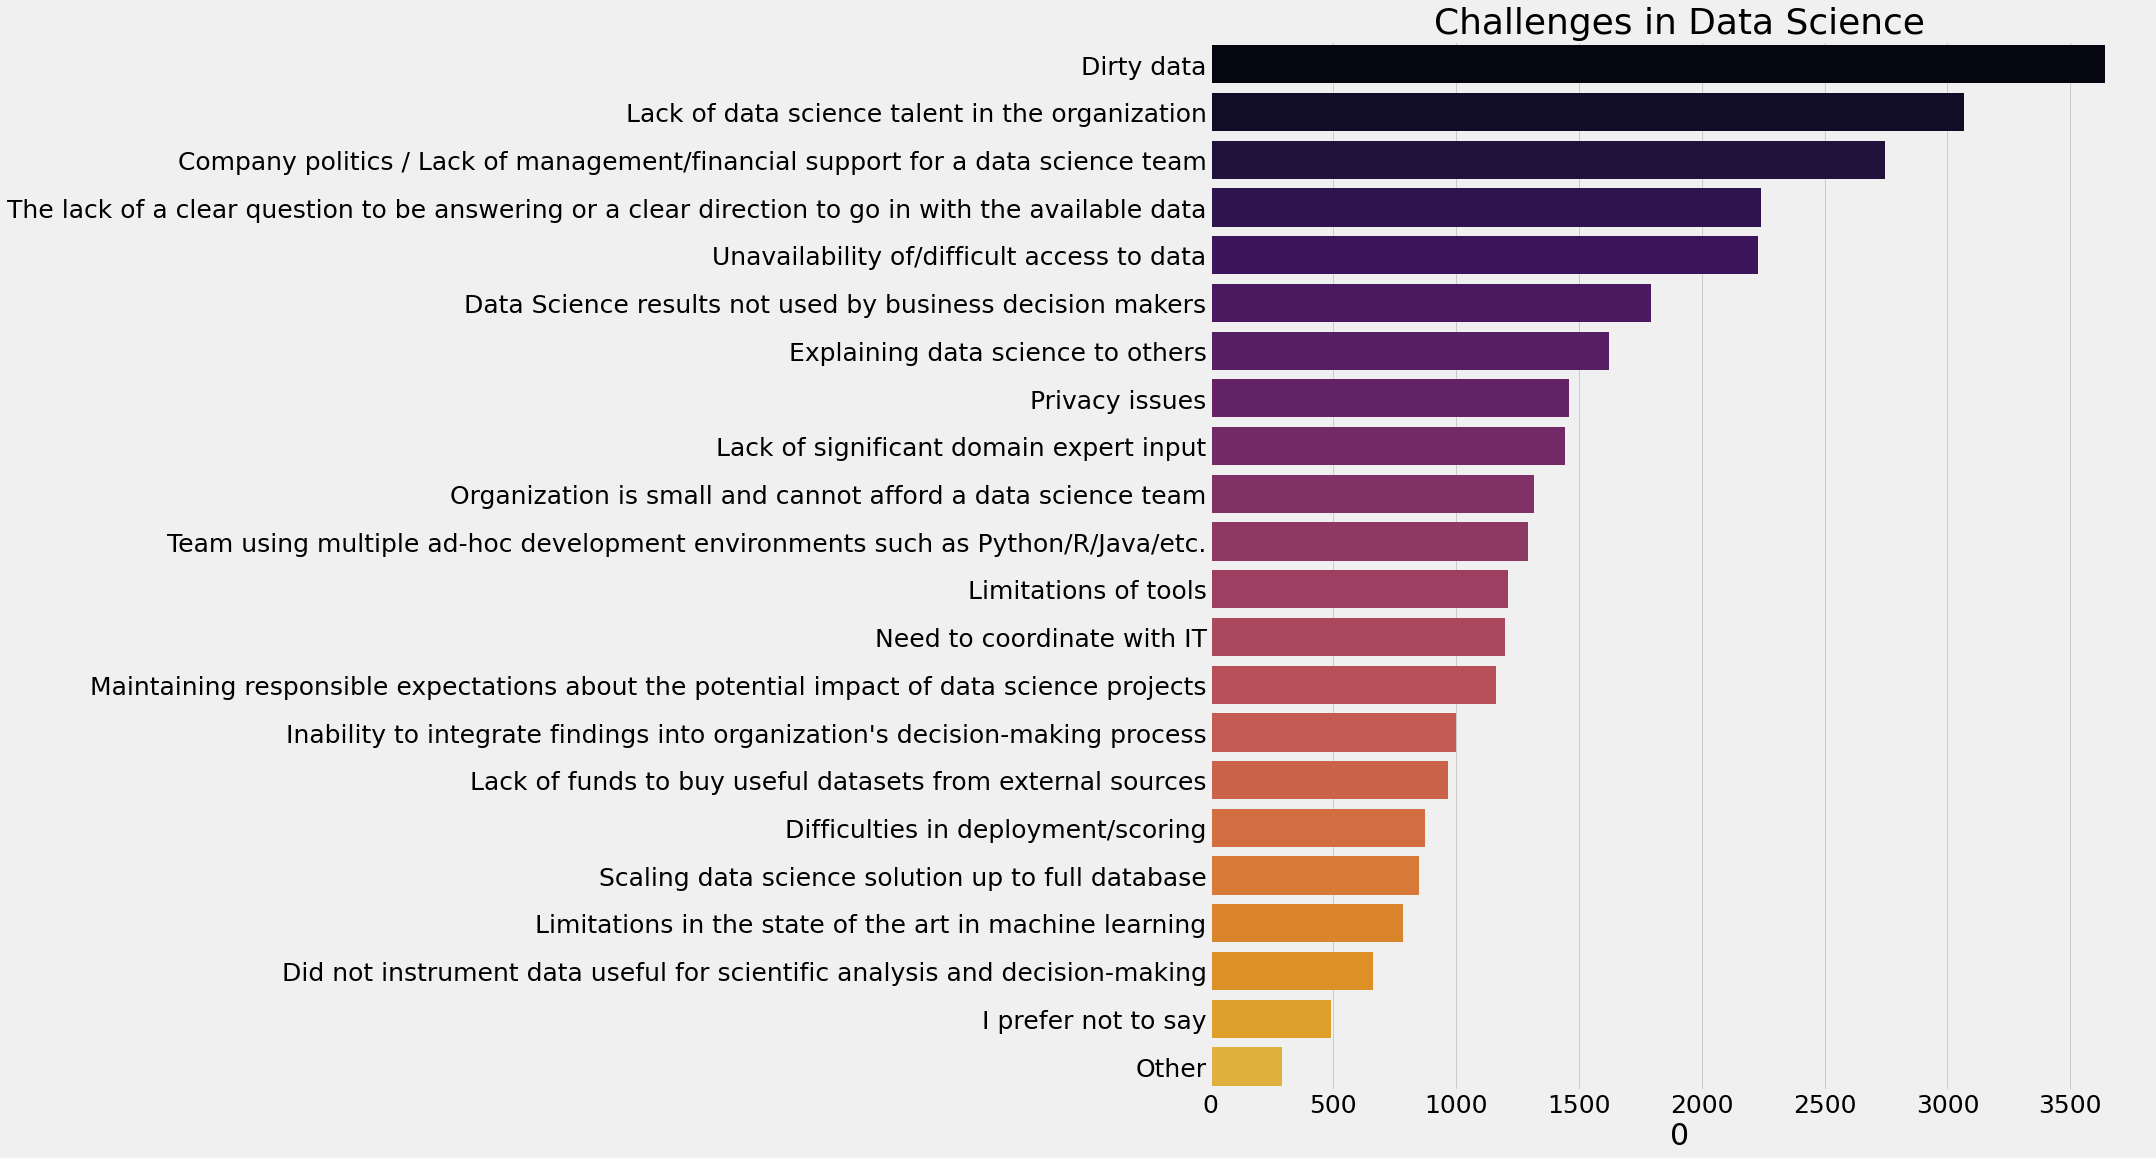

In [23]:
plt.subplots(figsize=(15,18))
challenge=response['WorkChallengesSelect'].str.split(',')
challenges=[]
for i in challenge.dropna():
    challenges.extend(i)
plt1=pd.Series(challenges).value_counts().sort_values(ascending=False).to_frame()
sns.barplot(plt1[0],plt1.index,palette=sns.color_palette('inferno',25))
plt.title('Challenges in Data Science')
plt.show()

最大的挑战是获得干净的数据

## 干这行的兄弟们，满意度如何？

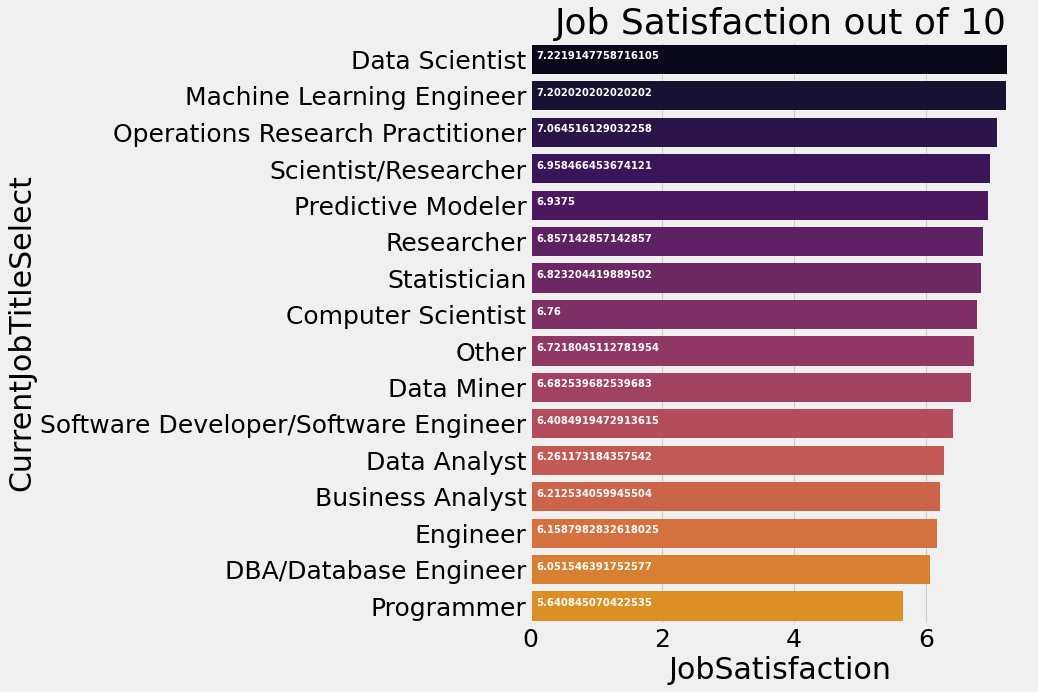

In [24]:
satisfy=response.copy()
satisfy['JobSatisfaction'].replace({'10 - Highly Satisfied':'10','1 - Highly Dissatisfied':'1','I prefer not to share':np.NaN},inplace=True)
satisfy.dropna(subset=['JobSatisfaction'],inplace=True)
satisfy['JobSatisfaction']=satisfy['JobSatisfaction'].astype(int)
satisfy_job=satisfy.groupby(['CurrentJobTitleSelect'])['JobSatisfaction'].mean().sort_values(ascending=False).to_frame()
ax=sns.barplot(y=satisfy_job.index,x=satisfy_job.JobSatisfaction,palette=sns.color_palette('inferno',20))
fig=plt.gcf()
fig.set_size_inches(8,10)
for i, v in enumerate(satisfy_job.JobSatisfaction): 
    ax.text(.1, i, v,fontsize=10,color='white',weight='bold')
plt.title('Job Satisfaction out of 10')
plt.show()

数据科学家和机器学习工程师是最满意的人，而程序员的工作满意度最低。

## Python vs R

Python和R是用于数据科学和机器学习的最广泛使用的开源语言。

对于一个刚入行的数据科学家或分析师，最大和最棘手的疑问是：我用什么语言开始？

虽然两种语言都有各自的优点和缺点，但在选择自己的语言时，这取决于个人的目的。

这两种语言都能满足各种不同工作的需要。

Python是一种通用的语言，比如，Web及应用、自动化运维、自动化测试，都有很好的项目

R是为了纯粹的统计和分析的目的。

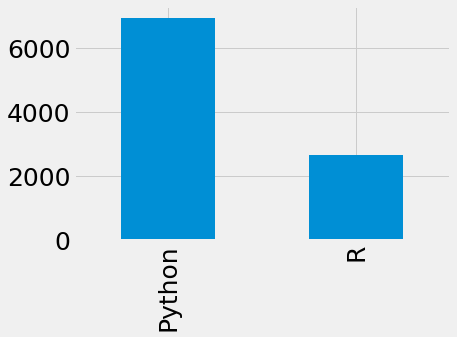

In [25]:
resp=response.dropna(subset=['WorkToolsSelect'])
resp=resp.merge(rates,left_on='CompensationCurrency',right_on='originCountry',how='left')
python=resp[(resp['WorkToolsSelect'].str.contains('Python'))&(~resp['WorkToolsSelect'].str.contains('R'))]
R=resp[(~resp['WorkToolsSelect'].str.contains('Python'))&(resp['WorkToolsSelect'].str.contains('R'))]
both=resp[(resp['WorkToolsSelect'].str.contains('Python'))&(resp['WorkToolsSelect'].str.contains('R'))]
response['LanguageRecommendationSelect'].value_counts()[:2].plot.bar()
plt.show()

人生苦短，我选Python

## 对于大家来说，两者的必要性？

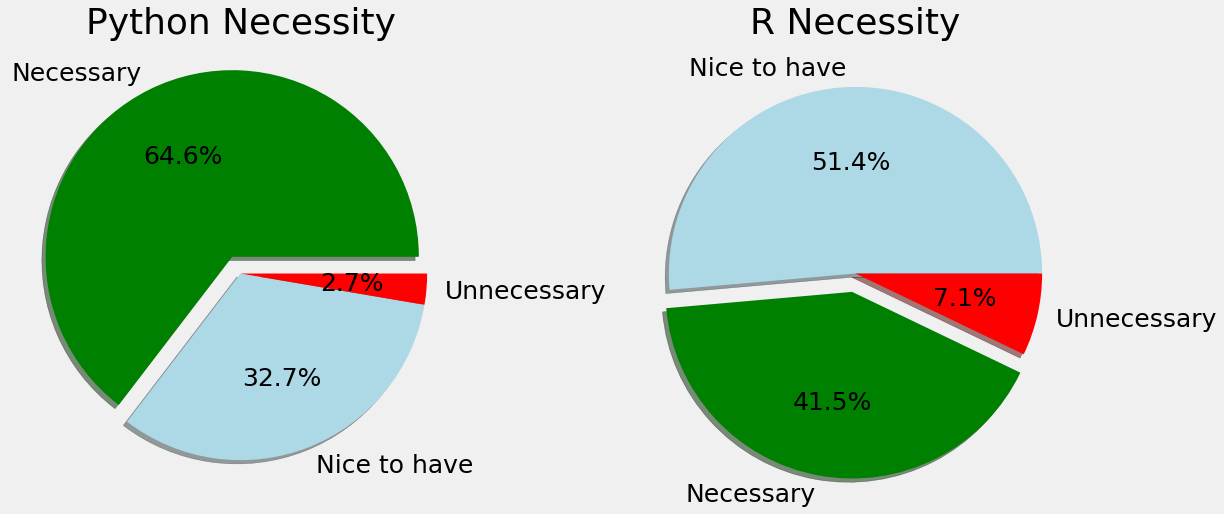

In [26]:
f,ax=plt.subplots(1,2,figsize=(18,8))
response['JobSkillImportancePython'].value_counts().plot.pie(ax=ax[0],autopct='%1.1f%%',explode=[0.1,0,0],shadow=True,colors=['g','lightblue','r'])
ax[0].set_title('Python Necessity')
ax[0].set_ylabel('')
response['JobSkillImportanceR'].value_counts().plot.pie(ax=ax[1],autopct='%1.1f%%',explode=[0,0.1,0],shadow=True,colors=['lightblue','g','r'])
ax[1].set_title('R Necessity')
ax[1].set_ylabel('')
plt.show()

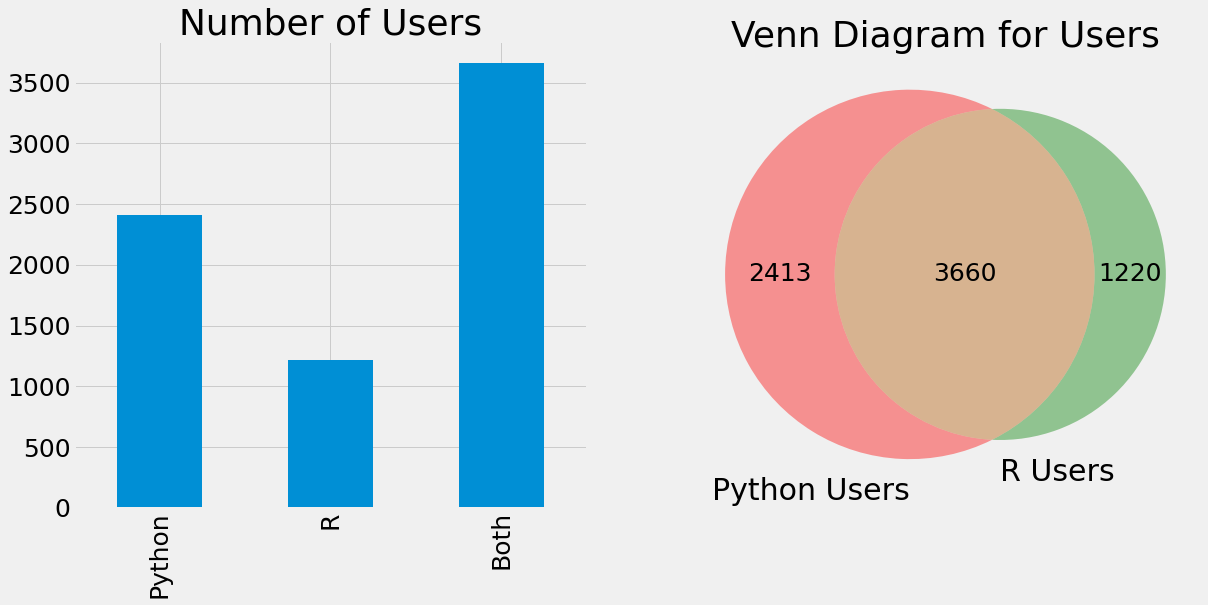

In [28]:
from matplotlib_venn import venn2
# pip install matplotlib_venn 画交集用的
f,ax=plt.subplots(1,2,figsize=(18,8))
pd.Series([python.shape[0],R.shape[0],both.shape[0]],index=['Python','R','Both']).plot.bar(ax=ax[0])
ax[0].set_title('Number of Users')
venn2(subsets = (python.shape[0],R.shape[0],both.shape[0]), set_labels = ('Python Users', 'R Users'))
plt.title('Venn Diagram for Users')
plt.show()

看来有这么多高手是通杀啊！

## 高手的薪资会不会更高呢？

In [29]:
py_sal=(pd.to_numeric(python['CompensationAmount'].dropna())*python['exchangeRate']).dropna()
py_sal=py_sal[py_sal<1000000]
R_sal=(pd.to_numeric(R['CompensationAmount'].dropna())*R['exchangeRate']).dropna()
R_sal=R_sal[R_sal<1000000]
both_sal=(pd.to_numeric(both['CompensationAmount'].dropna())*both['exchangeRate']).dropna()
both_sal=both_sal[both_sal<1000000]
trying=pd.DataFrame([py_sal,R_sal,both_sal])
trying=trying.transpose()
trying.columns=['Python','R','Both']
print('Median Salary For Individual using Python:',trying['Python'].median())
print('Median Salary For Individual using R:',trying['R'].median())
print('Median Salary For Individual knowing both languages:',trying['Both'].median())

Median Salary For Individual using Python: 48725.600000000006
Median Salary For Individual using R: 48421.99999999999
Median Salary For Individual knowing both languages: 59791.3


是这样滴！

## 不同工种的偏好

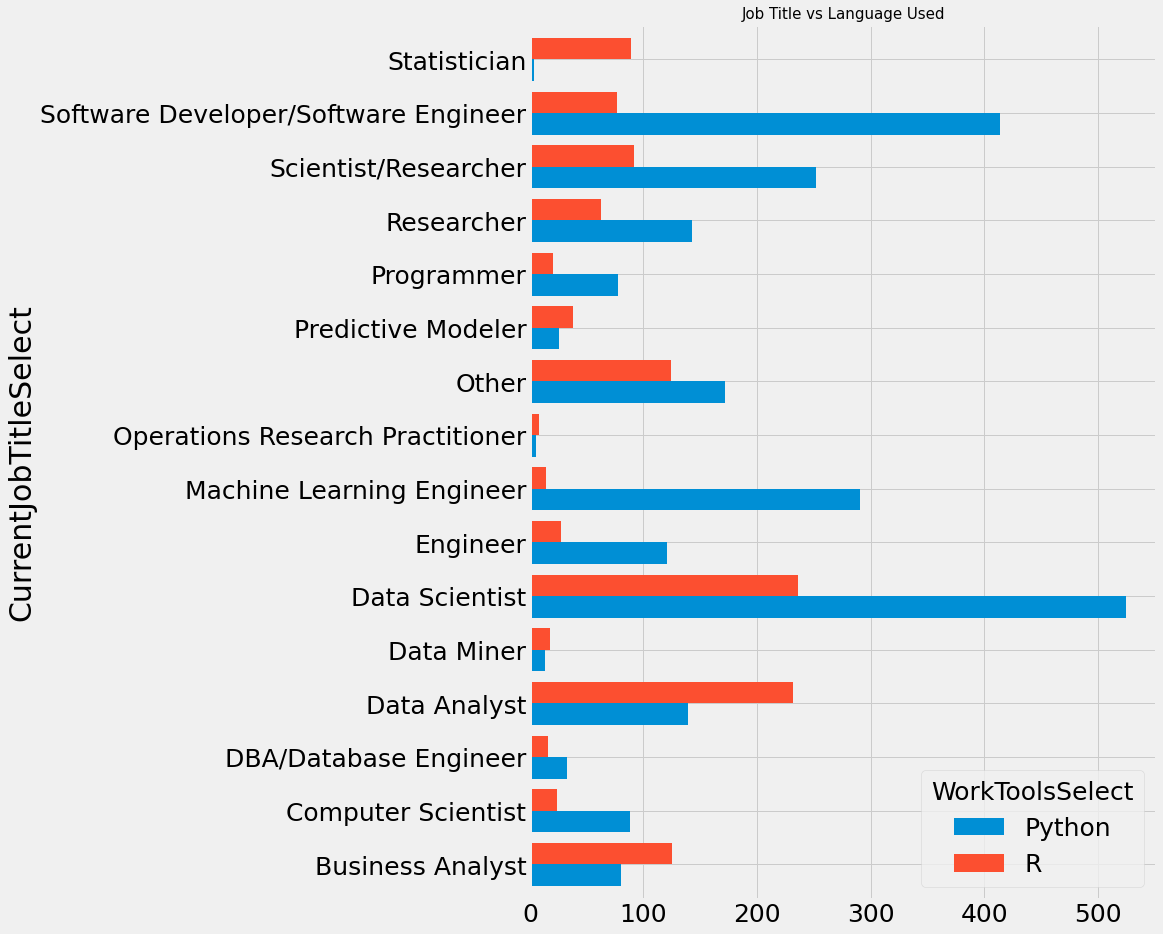

In [30]:
py1=python.copy()
r=R.copy()
py1['WorkToolsSelect']='Python'
r['WorkToolsSelect']='R'
r_vs_py=pd.concat([py1,r])
r_vs_py=r_vs_py.groupby(['CurrentJobTitleSelect','WorkToolsSelect'])['Age'].count().to_frame().reset_index()
r_vs_py.pivot('CurrentJobTitleSelect','WorkToolsSelect','Age').plot.barh(width=0.8)
fig=plt.gcf()
fig.set_size_inches(10,15)
plt.title('Job Title vs Language Used',size=15)
plt.show()

R在视觉上胜过Python。因此，拥有诸如数据分析师、业务分析师等职位头衔的人在图形和视觉上扮演着非常重要的角色，他们喜欢R而不是Python。

同样，几乎90%的统计人员使用R。

正如前面所述，Python在机器学习方面更好，因此机器学习工程师、数据科学家和DBA或程序员等其他人更喜欢Python。

## 看看大家的工龄！

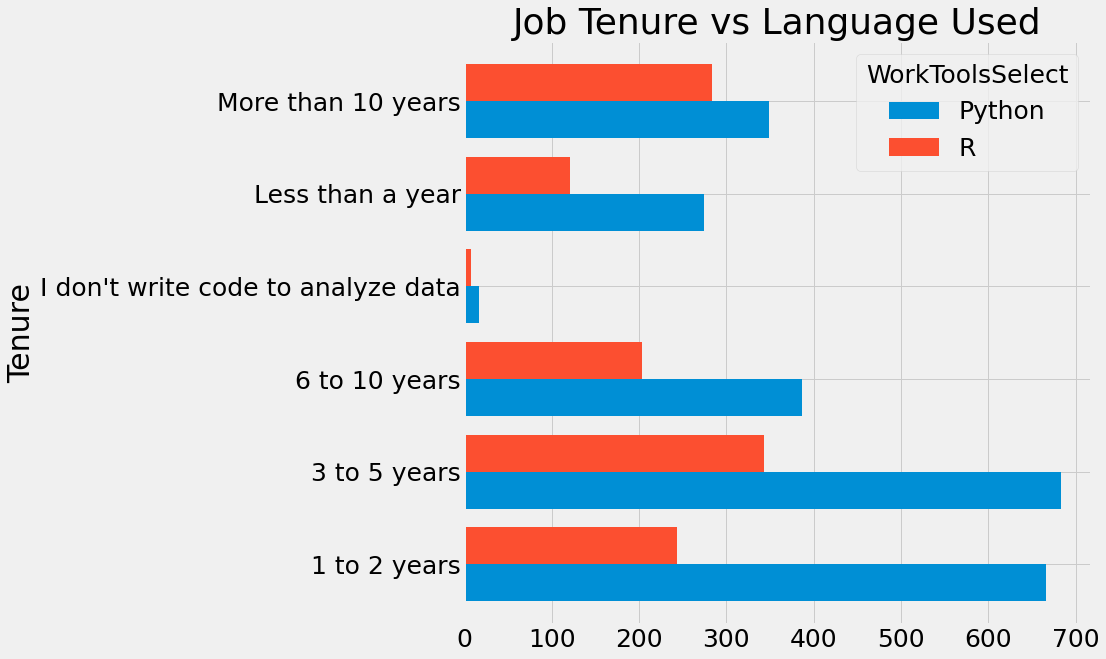

In [31]:
r_vs_py=pd.concat([py1,r])
r_vs_py=r_vs_py.groupby(['Tenure','WorkToolsSelect'])['Age'].count().to_frame().reset_index()
r_vs_py.pivot('Tenure','WorkToolsSelect','Age').plot.barh(width=0.8)
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.title('Job Tenure vs Language Used')
plt.show()

Python初学者会更多一些的！

## 不同的行业用哪门语言呢？

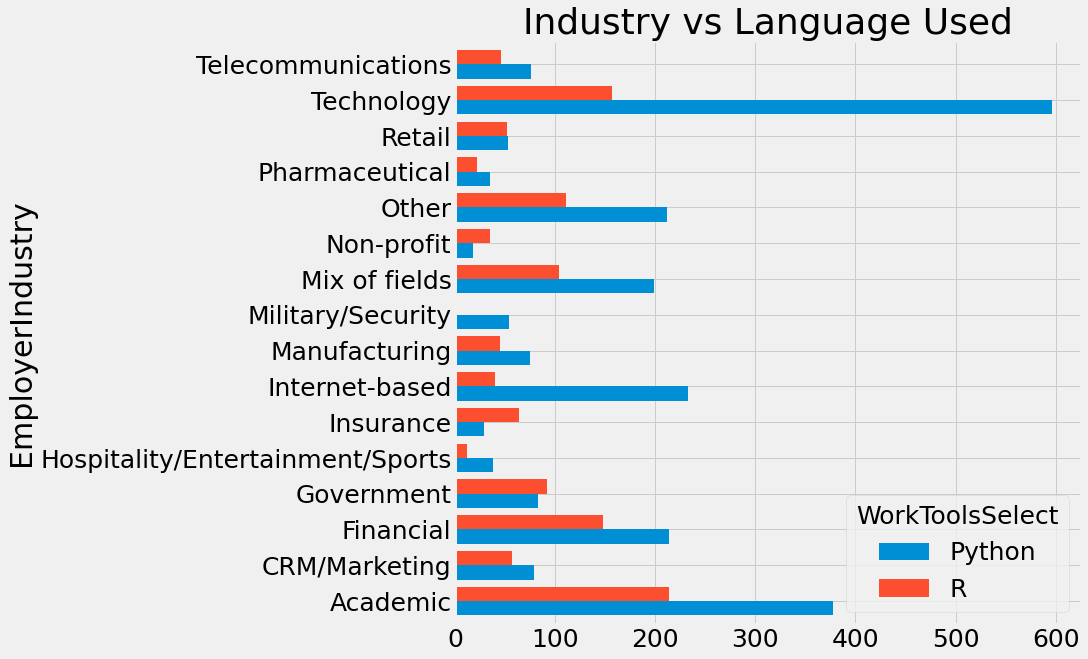

In [32]:
r_vs_py=pd.concat([py1,r])
r_vs_py=r_vs_py.groupby(['EmployerIndustry','WorkToolsSelect'])['Age'].count().to_frame().reset_index()
r_vs_py.pivot('EmployerIndustry','WorkToolsSelect','Age').plot.barh(width=0.8)
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.title('Industry vs Language Used')
plt.show()

R在政府部门还是很强大的。

在其他行业中，Python的份额大约比R高出15-20%。

## Python与R分别最常使用的工具是什么呢?

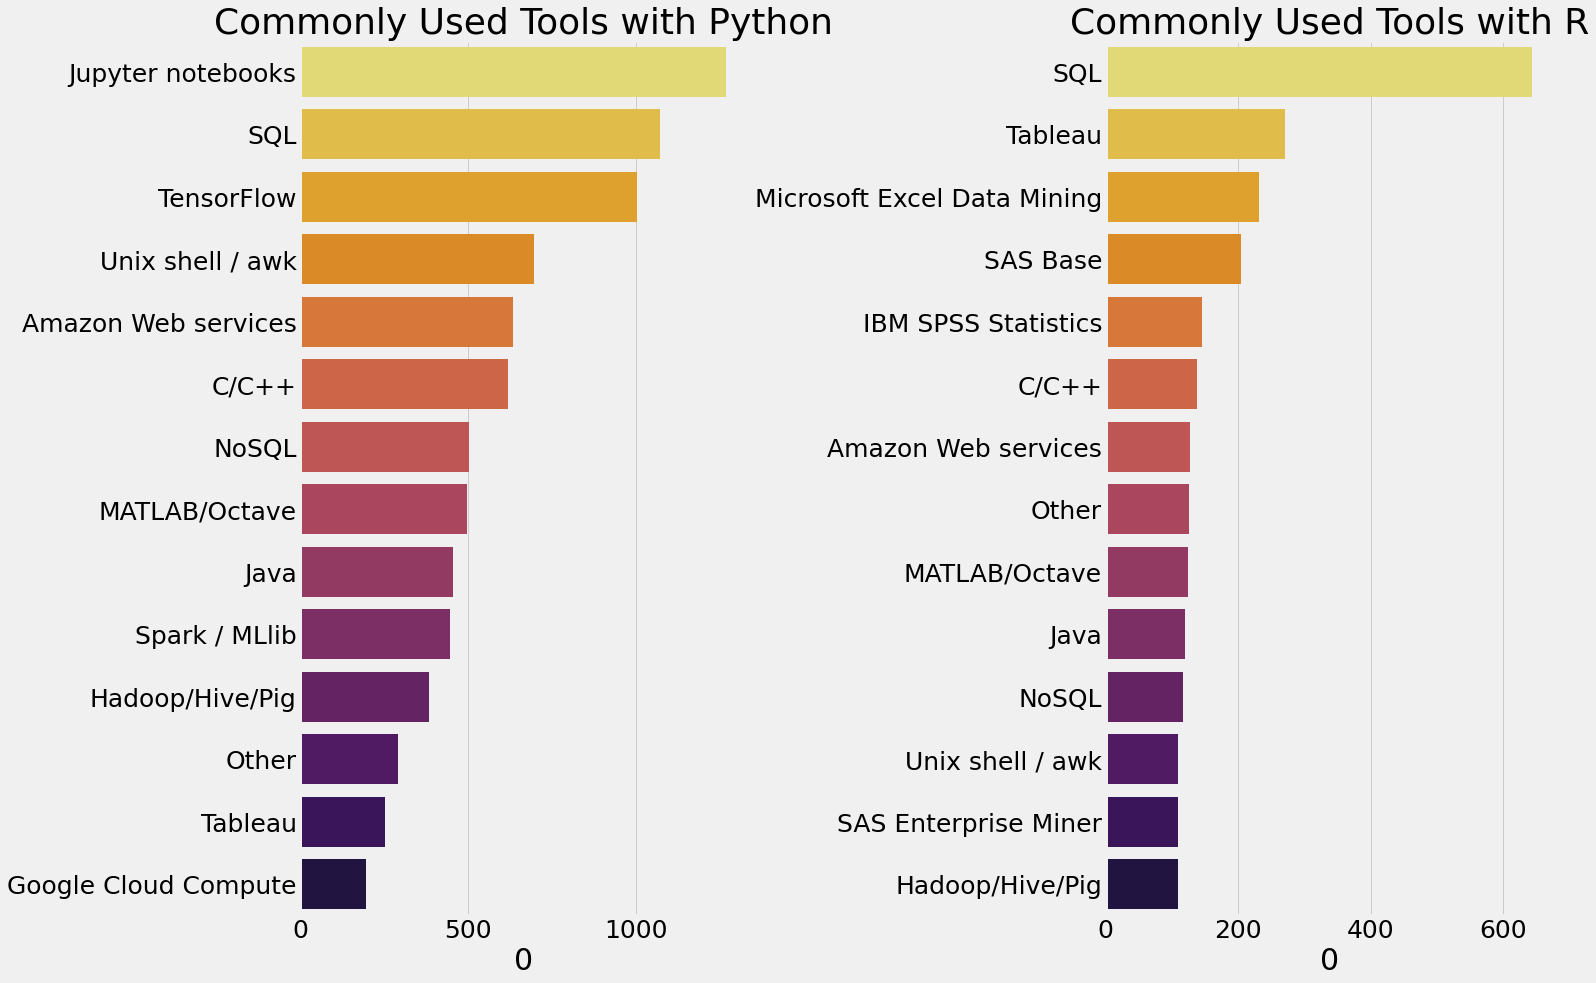

In [33]:
f,ax=plt.subplots(1,2,figsize=(20,15))
py_comp=python['WorkToolsSelect'].str.split(',')
py_comp1=[]
for i in py_comp:
    py_comp1.extend(i)
plt1=pd.Series(py_comp1).value_counts()[1:15].sort_values(ascending=False).to_frame()
sns.barplot(plt1[0],plt1.index,ax=ax[0],palette=sns.color_palette('inferno_r',15))
R_comp=R['WorkToolsSelect'].str.split(',')
R_comp1=[]
for i in R_comp:
    R_comp1.extend(i)
plt1=pd.Series(R_comp1).value_counts()[1:15].sort_values(ascending=False).to_frame()
sns.barplot(plt1[0],plt1.index,ax=ax[1],palette=sns.color_palette('inferno_r',15))
ax[0].set_title('Commonly Used Tools with Python')
ax[1].set_title('Commonly Used Tools with R')
plt.subplots_adjust(wspace=0.8)
plt.show()

SQL似乎成了最常见的补充工具。

SQL是查询大型数据库的主要语言，因此SQL也成了一个必会技能。

## 看看数据科学家们做什么都

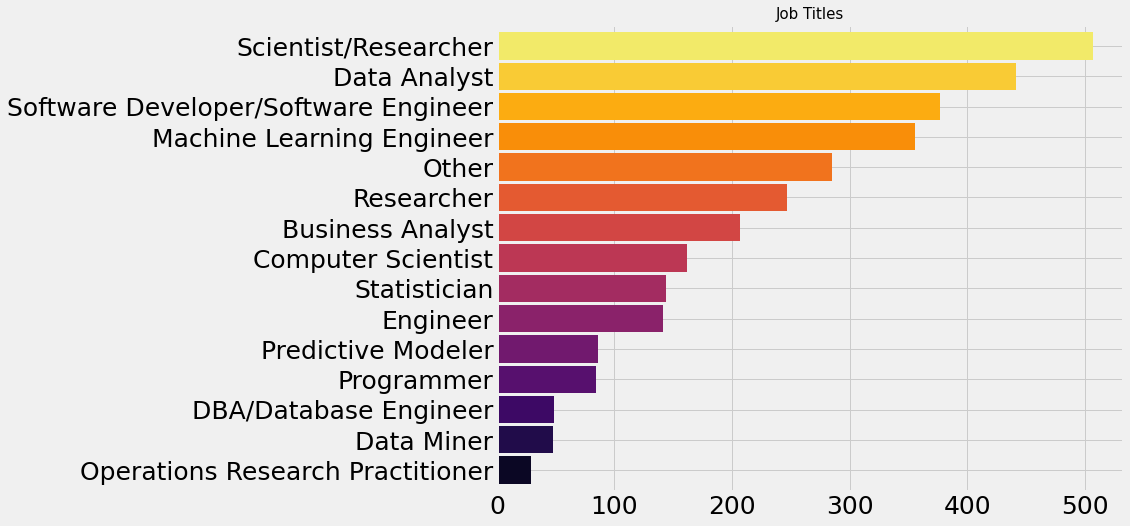

In [34]:
plt.subplots(figsize=(10,8))
scientist=response[response['DataScienceIdentitySelect']=='Yes']
scientist['CurrentJobTitleSelect'].value_counts().sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('inferno',15))
plt.title('Job Titles',size=15)
plt.show()

## 他们都在哪些国家呢？

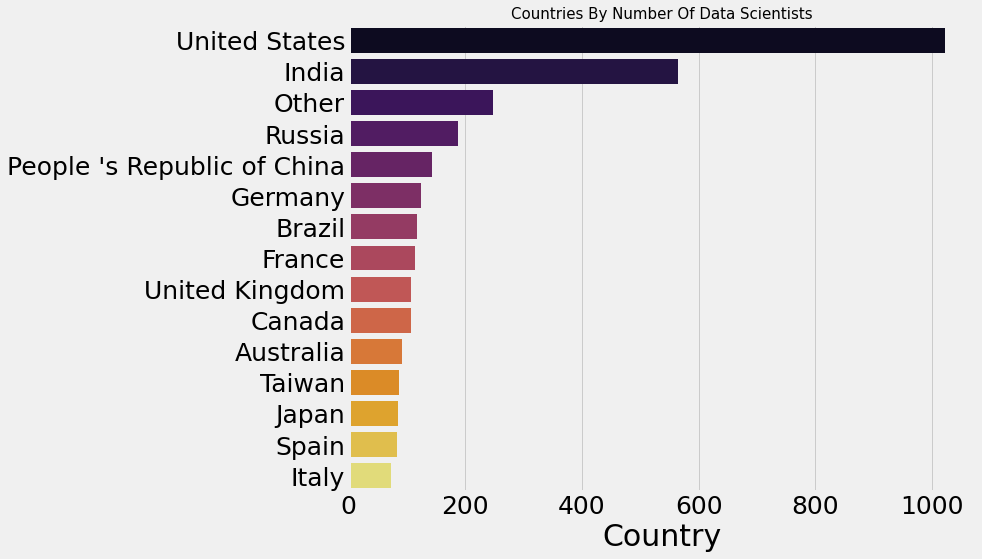

In [35]:
plt.subplots(figsize=(10,8))
coun=scientist['Country'].value_counts()[:15].sort_values(ascending=False).to_frame()
sns.barplot(coun.Country,coun.index,palette='inferno')
plt.title('Countries By Number Of Data Scientists',size=15)
plt.show()

## 教育背景以及工作情况

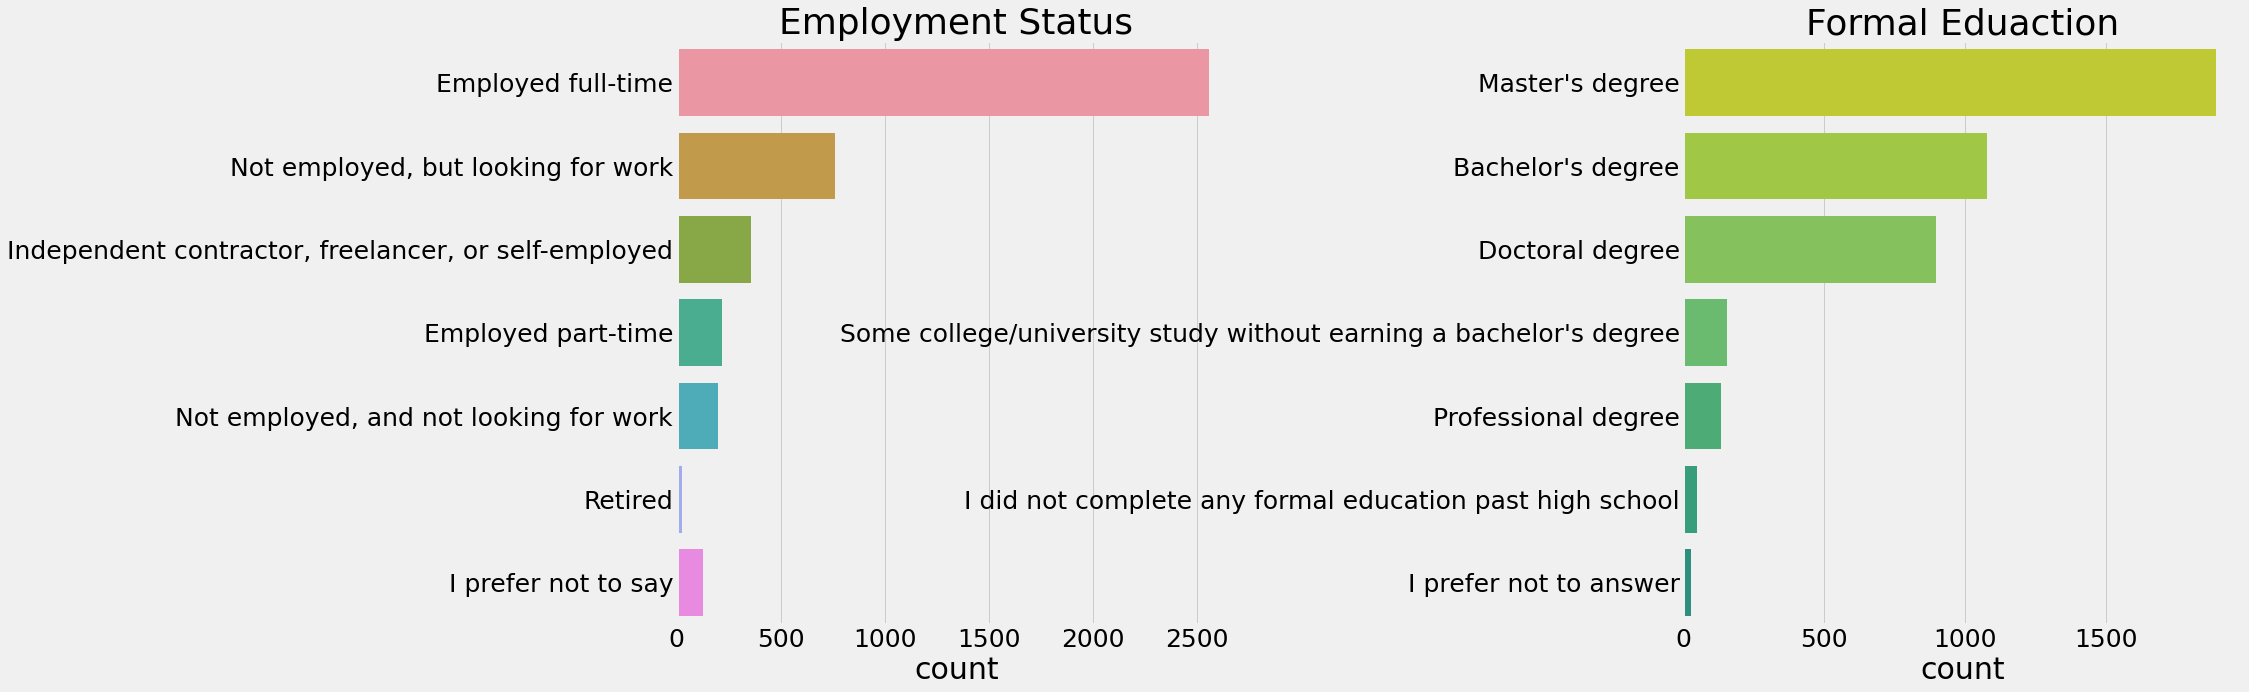

In [36]:
f,ax=plt.subplots(1,2,figsize=(25,10))
sns.countplot(y=scientist['EmploymentStatus'],ax=ax[0])
ax[0].set_title('Employment Status')
ax[0].set_ylabel('')
sns.countplot(y=scientist['FormalEducation'],order=scientist['FormalEducation'].value_counts().index,ax=ax[1],palette=sns.color_palette('viridis_r',15))
ax[1].set_title('Formal Eduaction')
ax[1].set_ylabel('')
plt.subplots_adjust(wspace=0.8)
plt.show()

大约67%的数据科学家都是全职，而大约11-12%都在找工作。

在教育方面显然对76%的数据科学家持有硕士学位，而约23-24%他们有学士学位或博士学位。因此，高学历似乎是成为数据科学家的一个重要因素。

让我们看看工资是如何根据教育而变化的。

## 学历跟工资挂钩吗

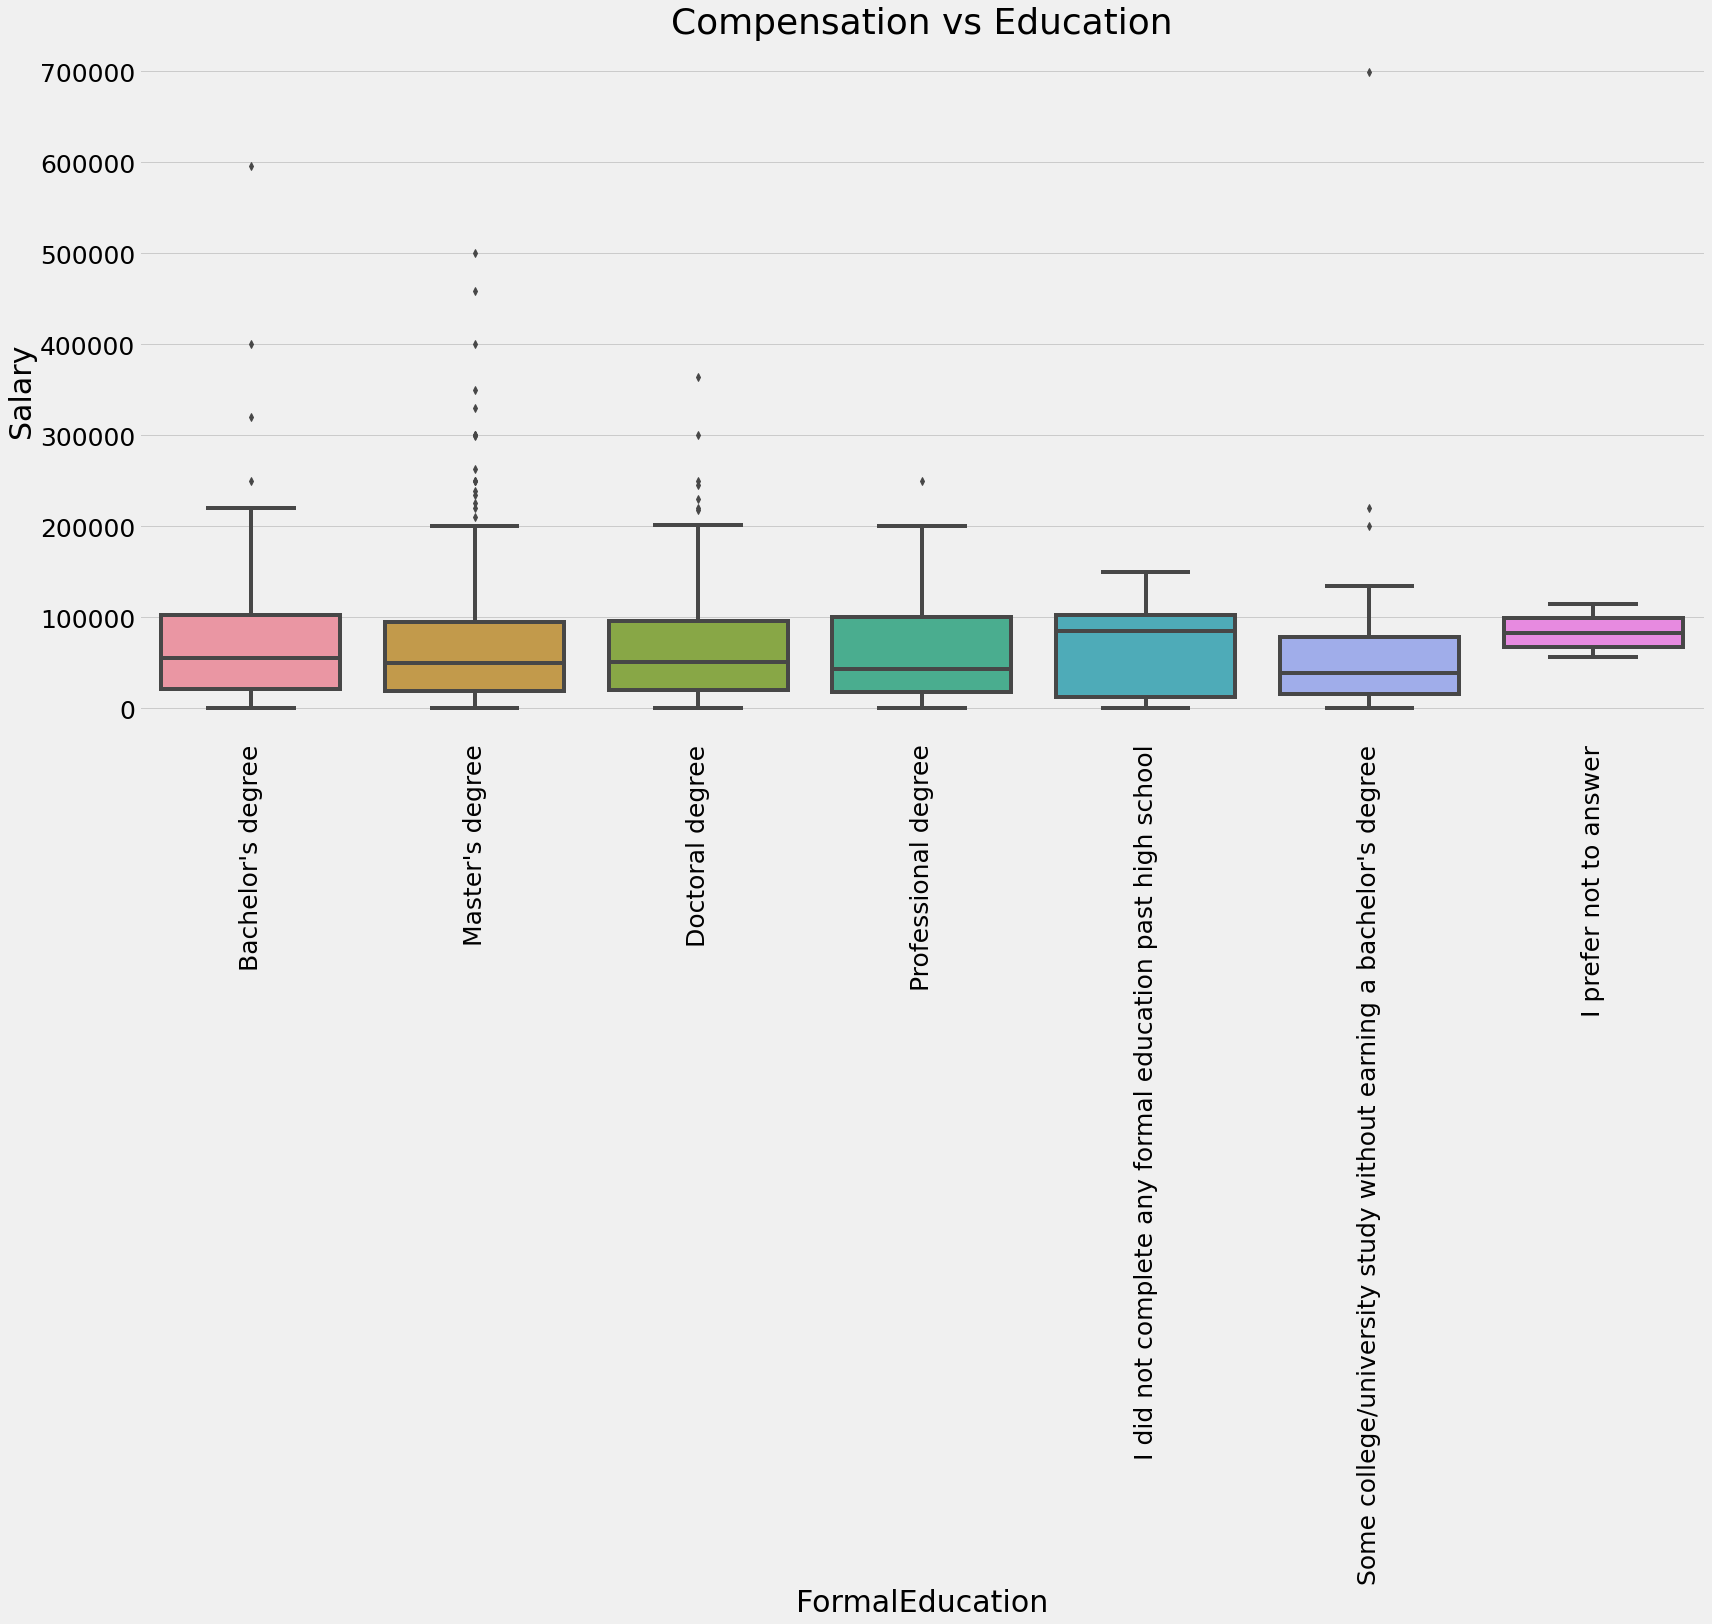

In [37]:
plt.subplots(figsize=(25,12))
comp_edu=scientist.merge(salary,left_index=True,right_index=True,how='left')
comp_edu=comp_edu[['FormalEducation','Salary']]
sns.boxplot(x='FormalEducation',y='Salary',data=comp_edu)
plt.title('Compensation vs Education')
plt.xticks(rotation=90)
plt.show()

这是令人惊讶的，因为学士学位、硕士学位和博士学位的薪水范围非常相似。

## 前一份工作和现在的改变

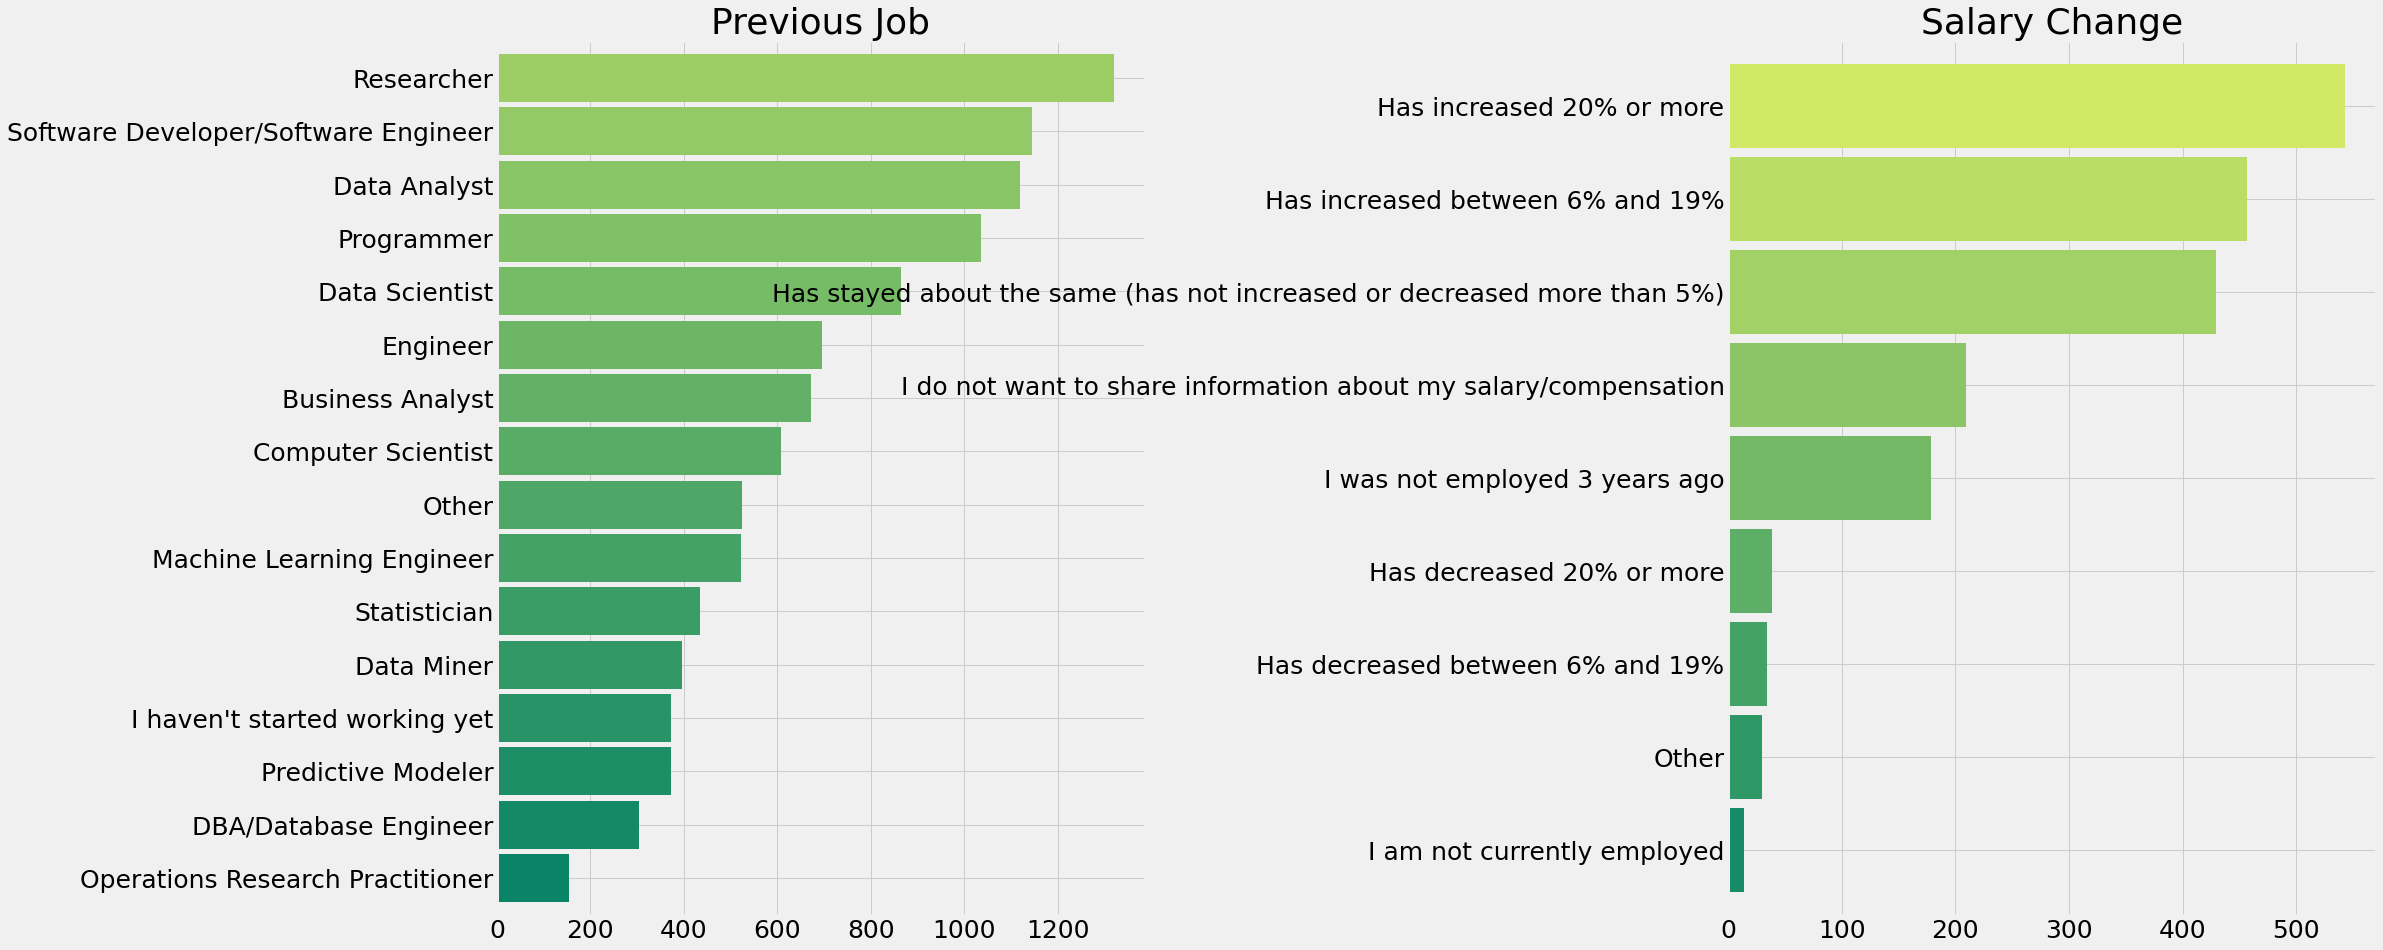

In [38]:
f,ax=plt.subplots(1,2,figsize=(30,15))
past=scientist['PastJobTitlesSelect'].str.split(',')
past_job=[]
for i in past.dropna():
    past_job.extend(i)
pd.Series(past_job).value_counts().sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('summer',25),ax=ax[0])
ax[0].set_title('Previous Job')
sal=scientist['SalaryChange'].str.split(',')
sal_change=[]
for i in sal.dropna():
    sal_change.extend(i)
pd.Series(sal_change).value_counts().sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('summer',10),ax=ax[1])
ax[1].set_title('Salary Change')
plt.subplots_adjust(wspace=0.9)
plt.show()

大部分还是涨了些工资的

## 数据科学家们都用什么

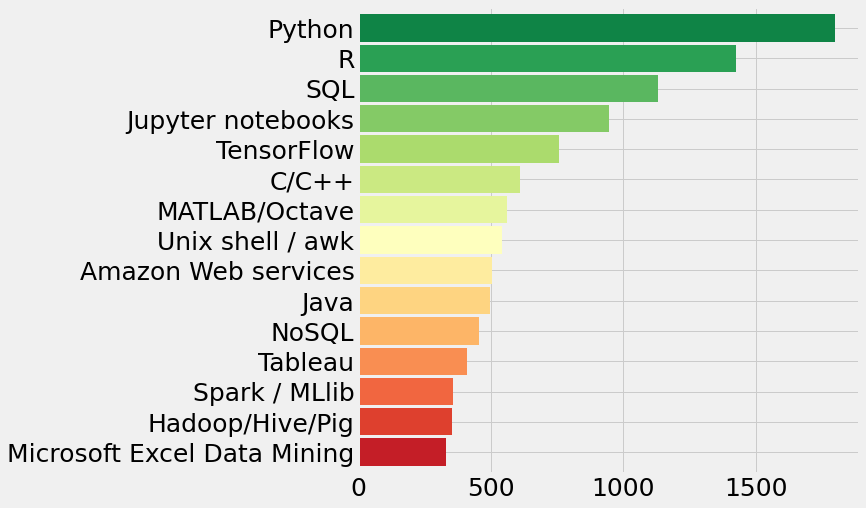

In [39]:
plt.subplots(figsize=(8,8))
tools=scientist['WorkToolsSelect'].str.split(',')
tools_work=[]
for i in tools.dropna():
    tools_work.extend(i)
pd.Series(tools_work).value_counts()[:15].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('RdYlGn',15))
plt.show()

## 他们都在哪学习

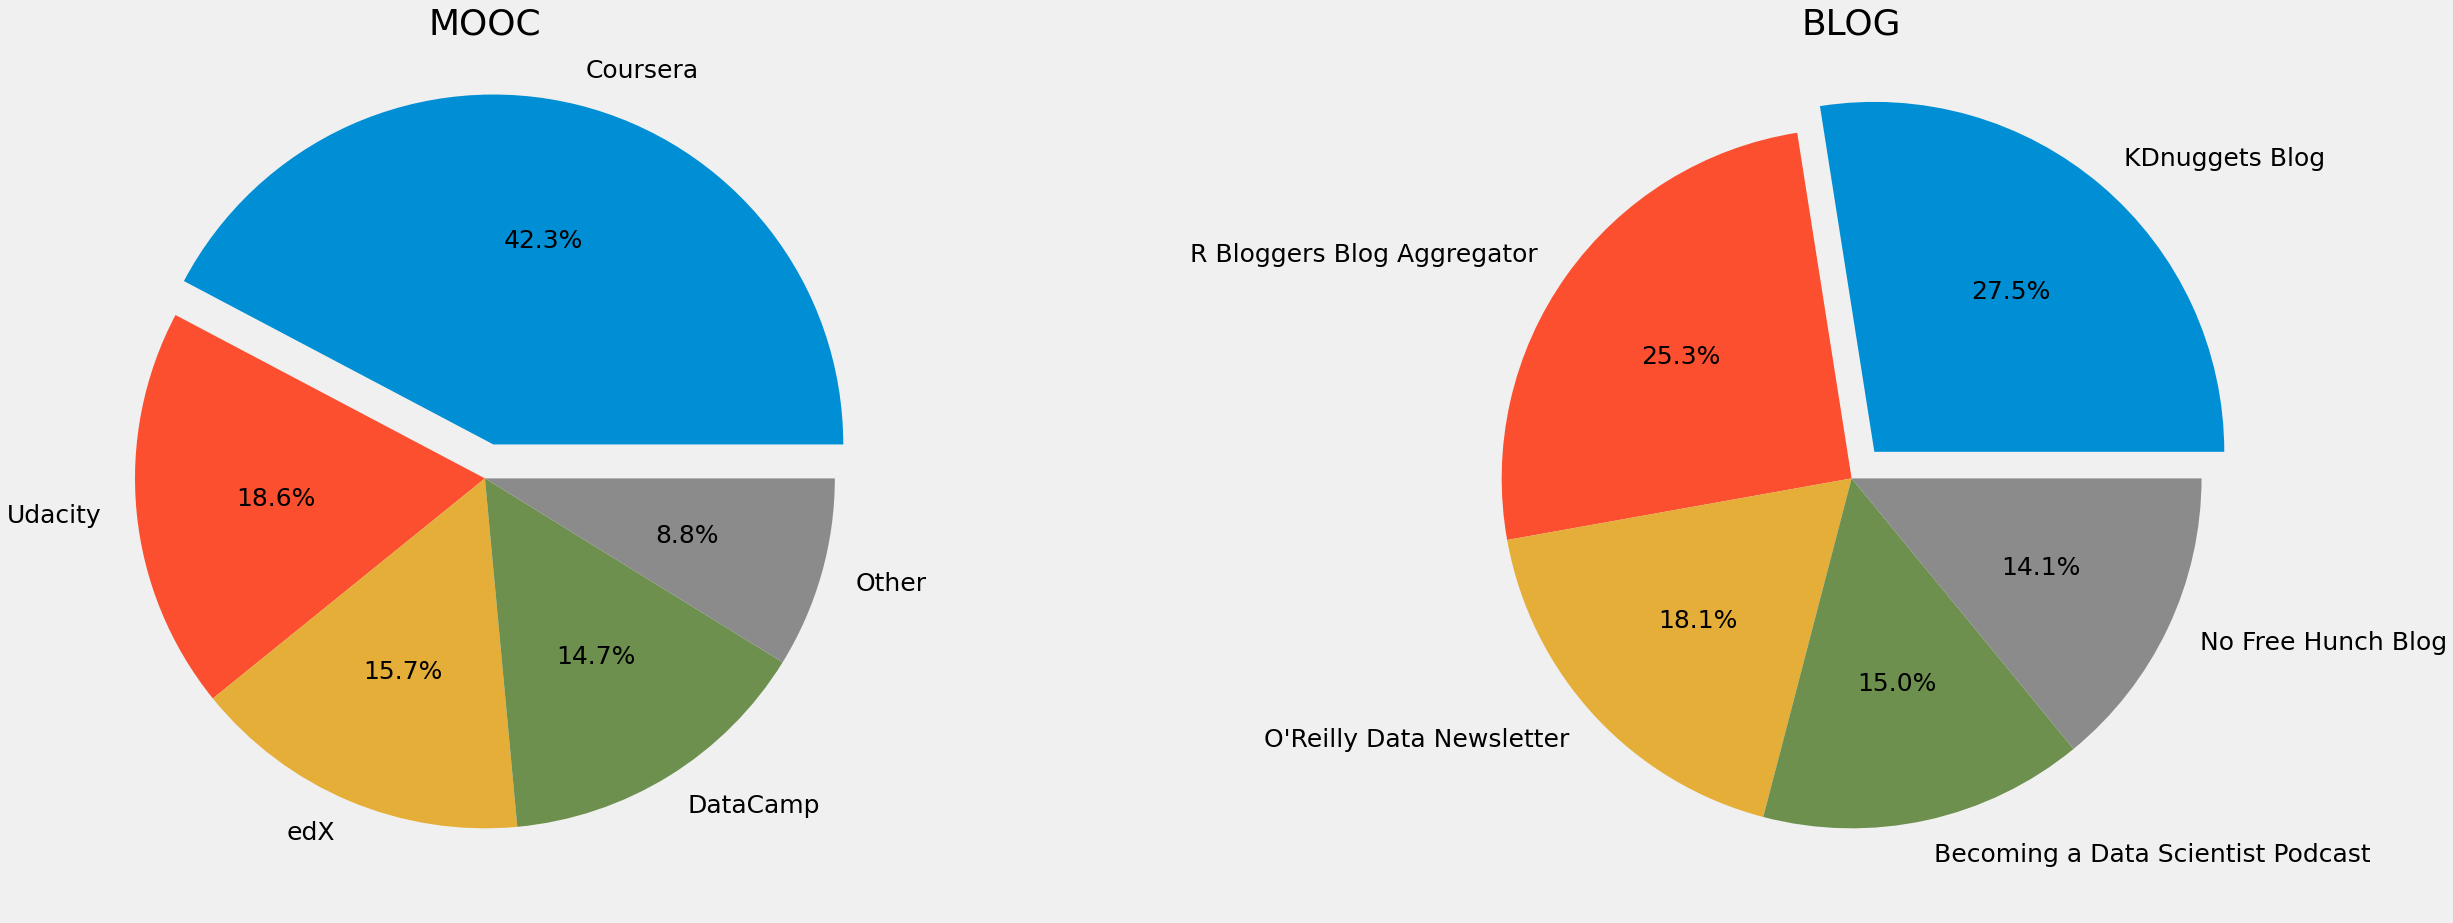

In [108]:
course=scientist['CoursePlatformSelect'].str.split(',')
course_plat=[]
for i in course.dropna():
    course_plat.extend(i)
course_plat=pd.Series(course_plat).value_counts()
blogs=scientist['BlogsPodcastsNewslettersSelect'].str.split(',')
blogs_fam=[]
for i in blogs.dropna():
    blogs_fam.extend(i)
blogs_fam=pd.Series(blogs_fam).value_counts()
labels1=course_plat.index
sizes1=course_plat.values

labels2=blogs_fam[:5].index
sizes2=blogs_fam[:5].values


fig = {
  "data": [
    {
      "values": sizes1,
      "labels": labels1,
      "domain": {"x": [0, .48]},
      "name": "MOOC",
      "hoverinfo":"label+percent+name",
      "hole": .4,
      "type": "pie"
    },     
    {
      "values": sizes2 ,
      "labels": labels2,
      "text": "CO2",
      "textposition":"inside",
      "domain": {"x": [.54, 1]},
      "name": "Blog",
      "hoverinfo":"label+percent+name",
      "hole": .4,
      "type": "pie"
    }],
  "layout": {
        "title":"Blogs and Online Platforms",
        "showlegend":True,
        "annotations": [
            {
                "font": {
                    "size": 12
                },
                "showarrow": False,
                "text": "MOOC's",
                "x": 0.18,
                "y": 0.5
            },
            {
                "font": {
                    "size": 12
                },
                "showarrow": False,
                "text": "BLOGS",
                "x": 0.83,
                "y": 0.5}]}}
# py.iplot(fig)
fig, axs = plt.subplots(1,2,figsize=(40,15))
axs[0].set_title("MOOC")
axs[1].set_title("BLOG")
axs[0].pie(sizes1, labels=labels1, autopct='%1.1f%%', explode=(0.1,0,0,0,0))
axs[1].pie(sizes2, labels=labels2, autopct='%1.1f%%', explode=(0.1,0,0,0,0))
plt.show()

Coursera是最受欢迎的平台

## 时间都用在哪了

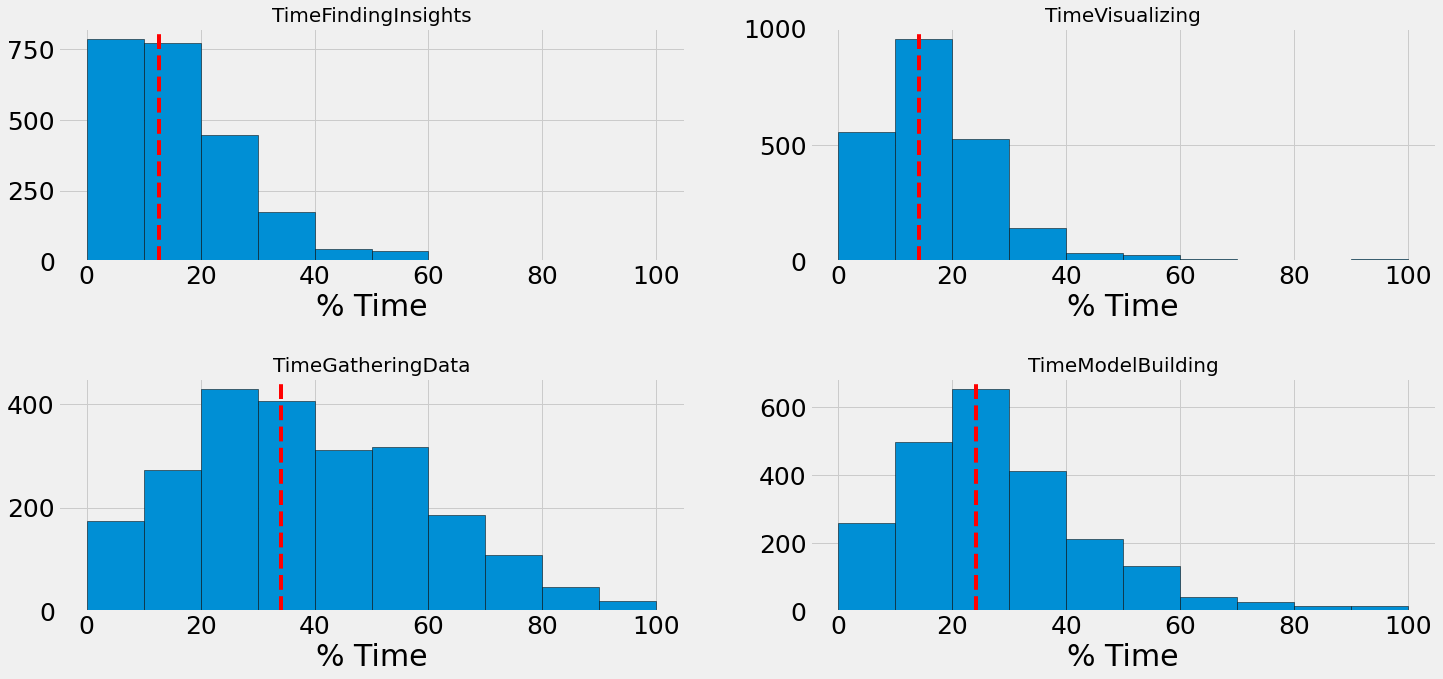

In [91]:
import itertools
plt.subplots(figsize=(22,10))
time_spent=['TimeFindingInsights','TimeVisualizing','TimeGatheringData','TimeModelBuilding']
length=len(time_spent)
for i,j in itertools.zip_longest(time_spent,range(length)):
    plt.subplot((length/2),2,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    scientist[i].hist(bins=10,edgecolor='black')
    plt.axvline(scientist[i].mean(),linestyle='dashed',color='r')
    plt.title(i,size=20)
    plt.xlabel('% Time')
plt.show()


## 常用平台

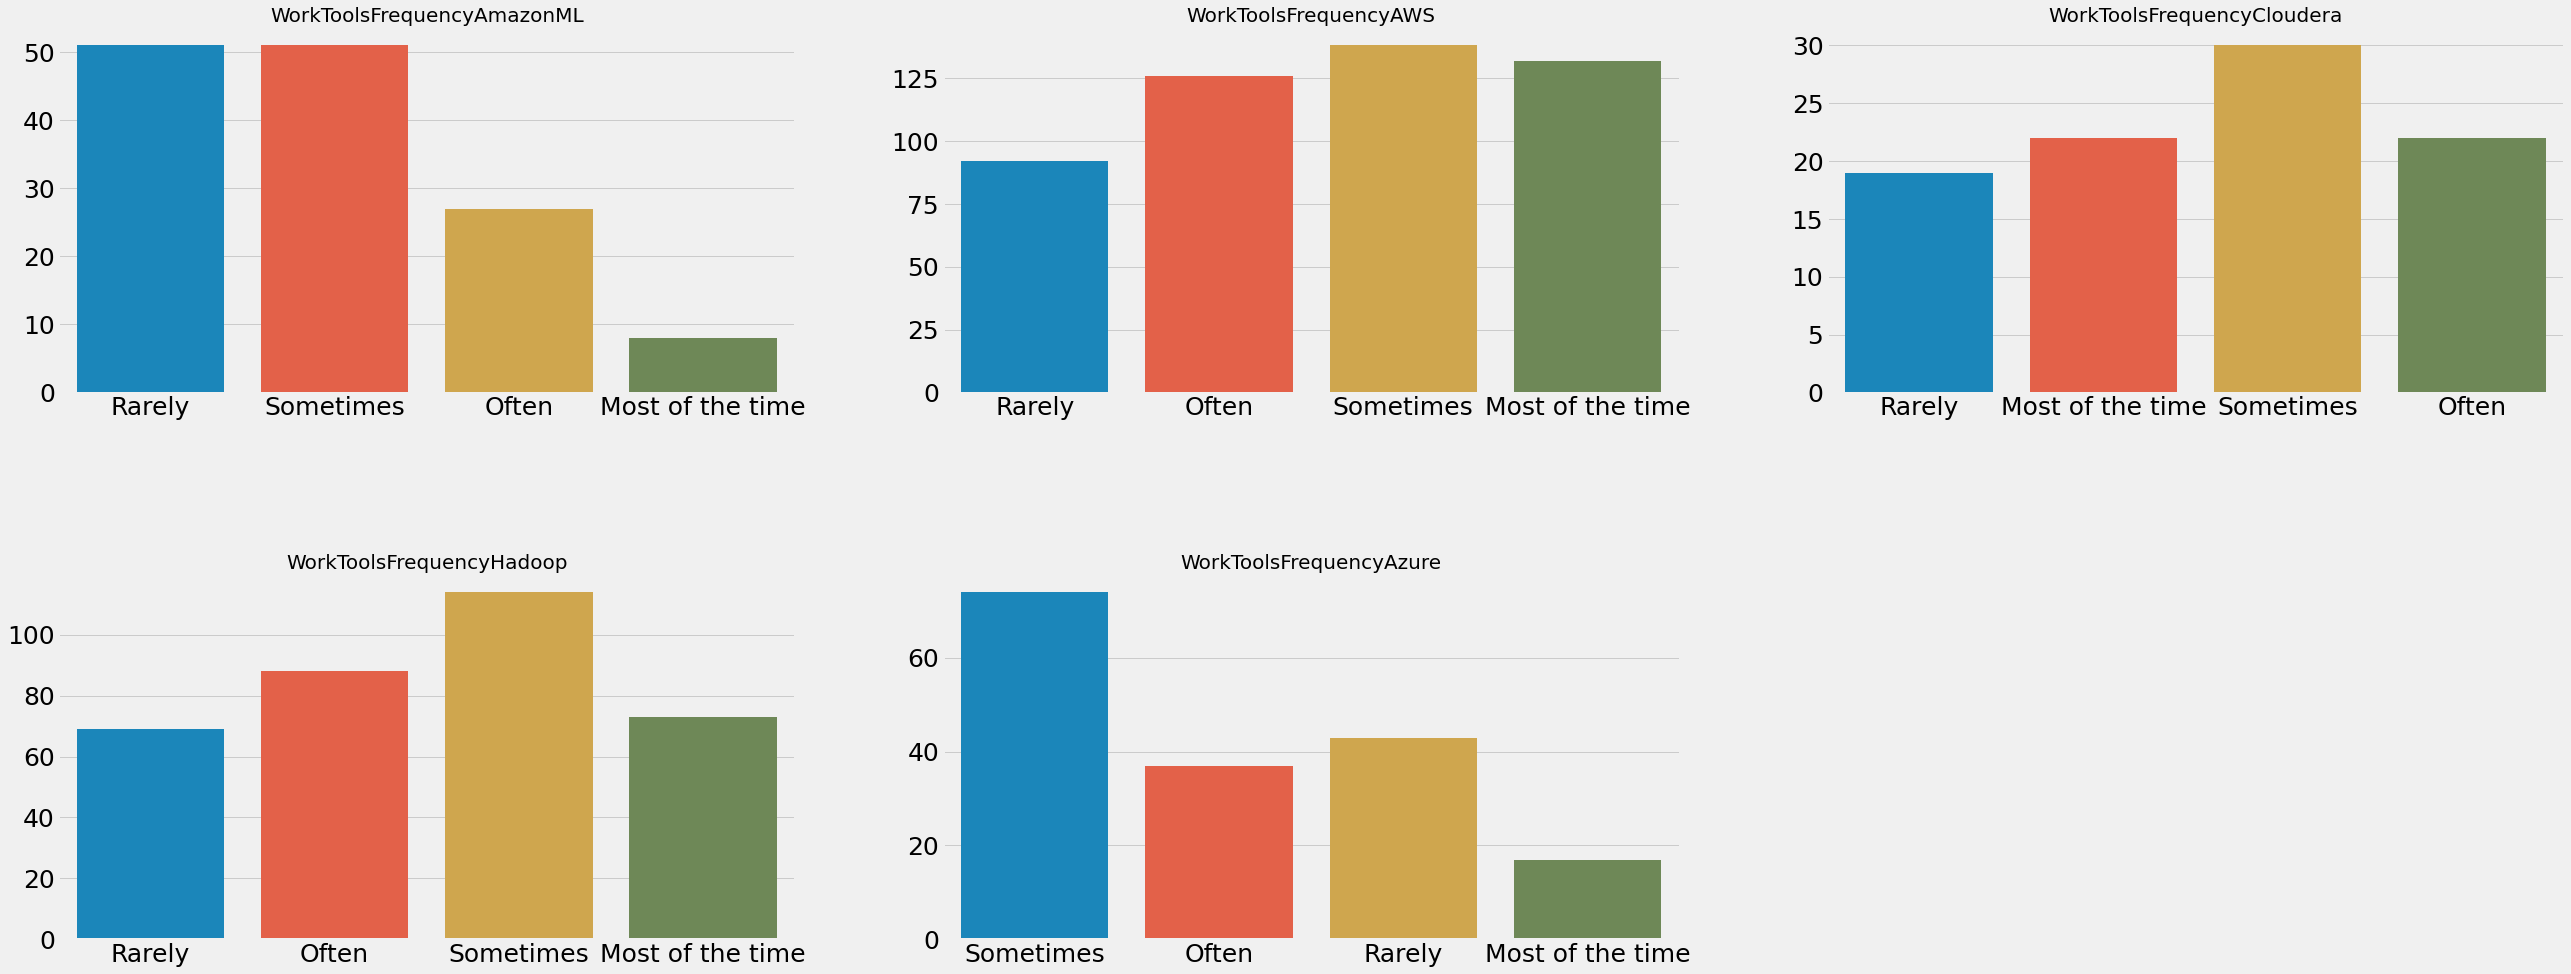

In [94]:
cloud=['WorkToolsFrequencyAmazonML','WorkToolsFrequencyAWS','WorkToolsFrequencyCloudera','WorkToolsFrequencyHadoop','WorkToolsFrequencyAzure']
plt.subplots(figsize=(40,25))
length=len(cloud)
for i,j in itertools.zip_longest(cloud,range(length)):
    plt.subplot((length/2+1),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    sns.countplot(i,data=scientist)
    plt.title(i,size=20)
    plt.ylabel('')
    plt.xlabel('')
plt.show()

## 对可视化的重视程度

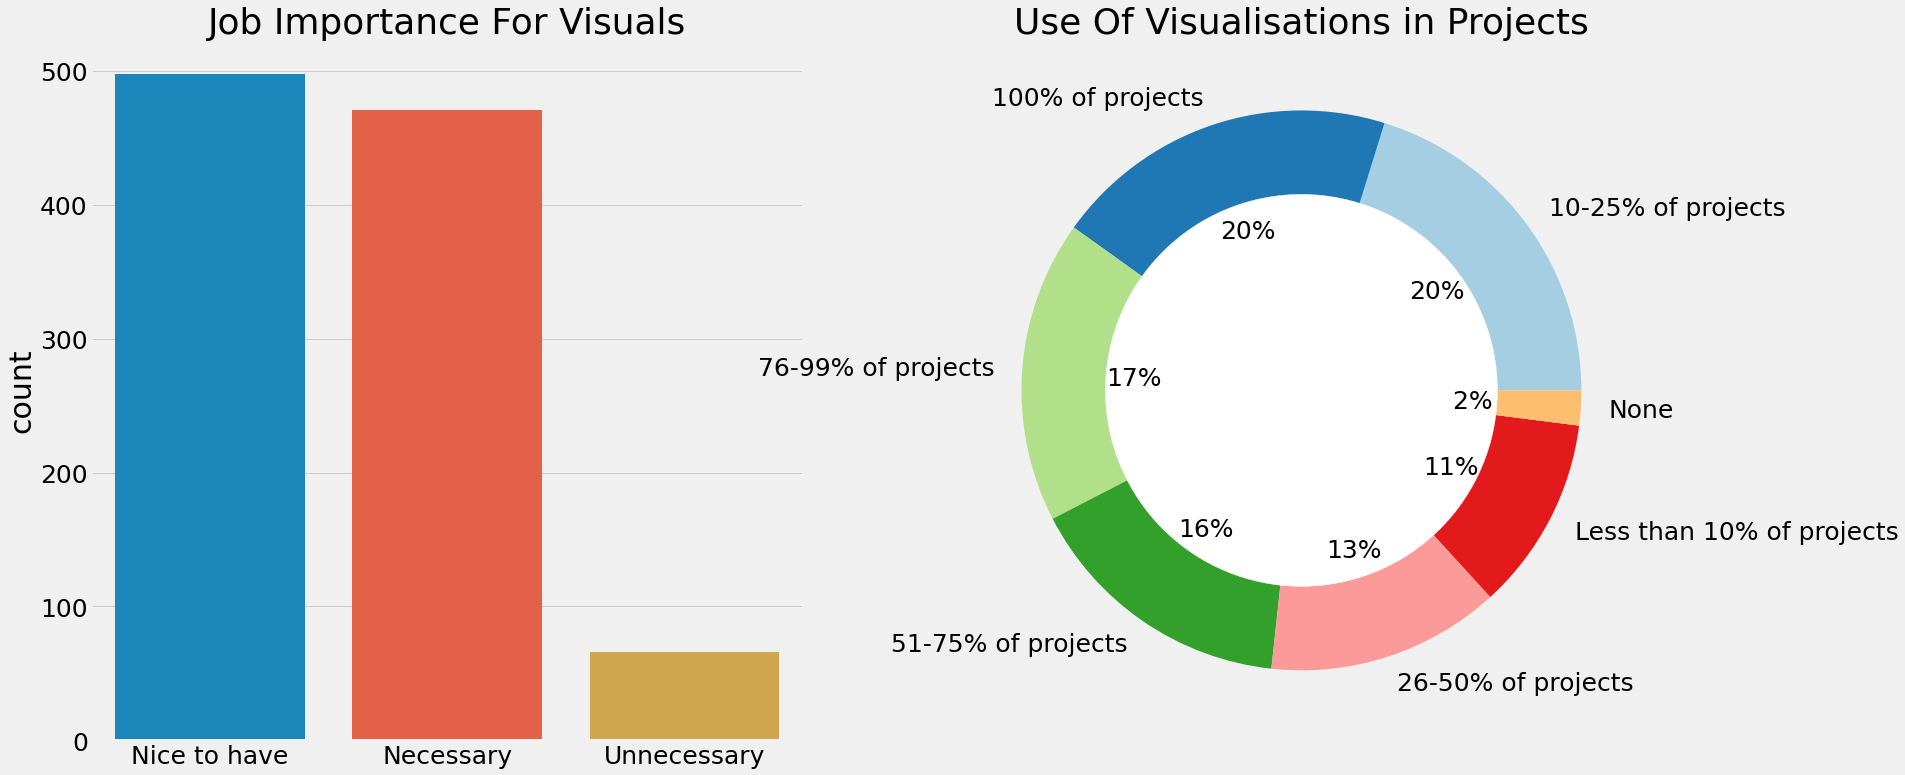

In [95]:
f,ax=plt.subplots(1,2,figsize=(25,12))
sns.countplot(scientist['JobSkillImportanceVisualizations'],ax=ax[0])
ax[0].set_title('Job Importance For Visuals')
ax[0].set_xlabel('')
scientist['WorkDataVisualizations'].value_counts().plot.pie(autopct='%2.0f%%',colors=sns.color_palette('Paired',10),ax=ax[1])
ax[1].set_title('Use Of Visualisations in Projects')
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.ylabel('')
plt.show()

可视化是数据科学项目不可或缺的一部分

## 如何证明你的实例呢

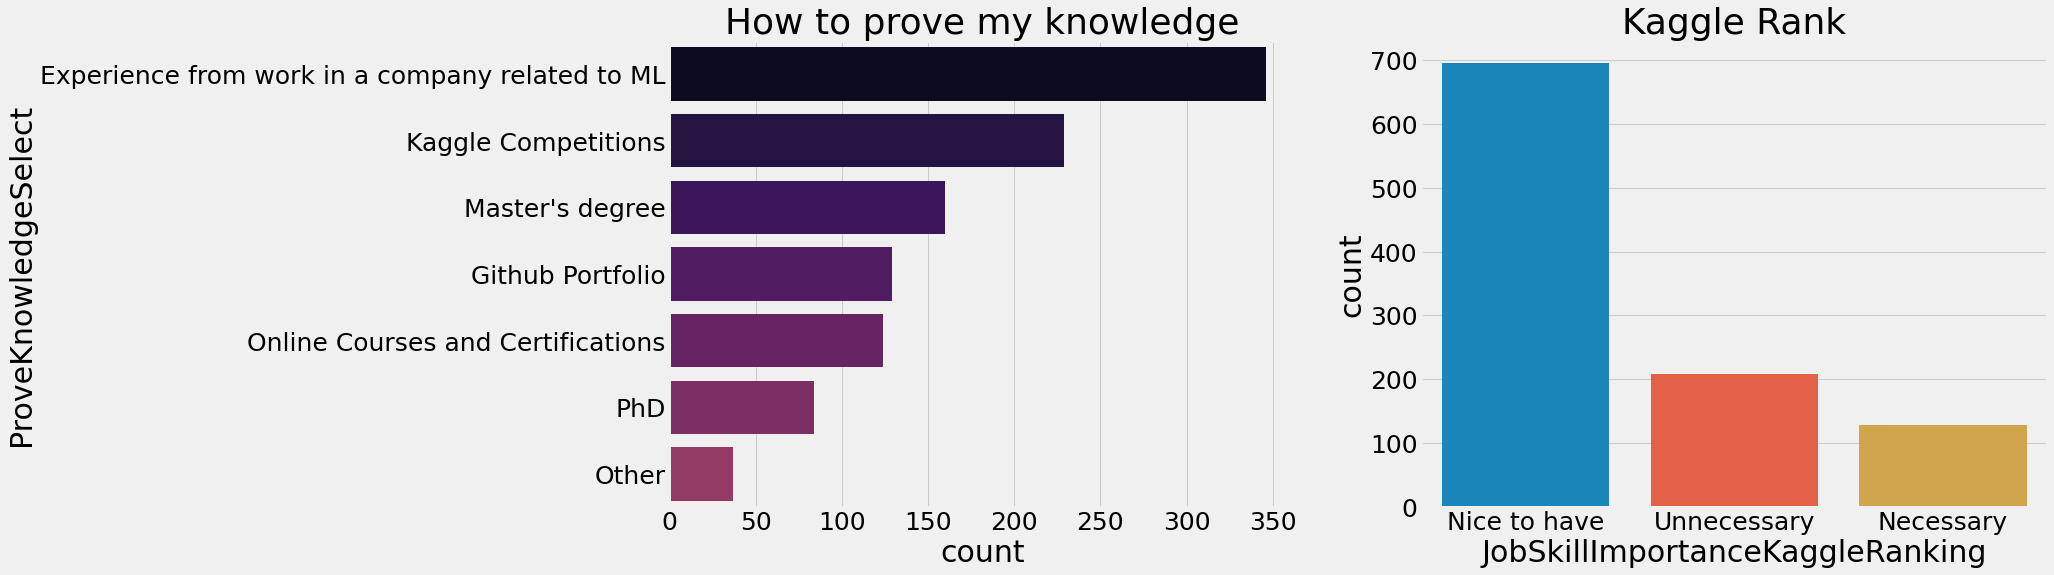

In [109]:
f,ax=plt.subplots(1,2,figsize=(22,8))
sns.countplot(y=scientist['ProveKnowledgeSelect'],order=scientist['ProveKnowledgeSelect'].value_counts().index,ax=ax[0],palette=sns.color_palette('inferno',15))
ax[0].set_title('How to prove my knowledge')
sns.countplot(scientist['JobSkillImportanceKaggleRanking'],ax=ax[1])
ax[1].set_title('Kaggle Rank')
plt.show()

## 怎么找工作的？

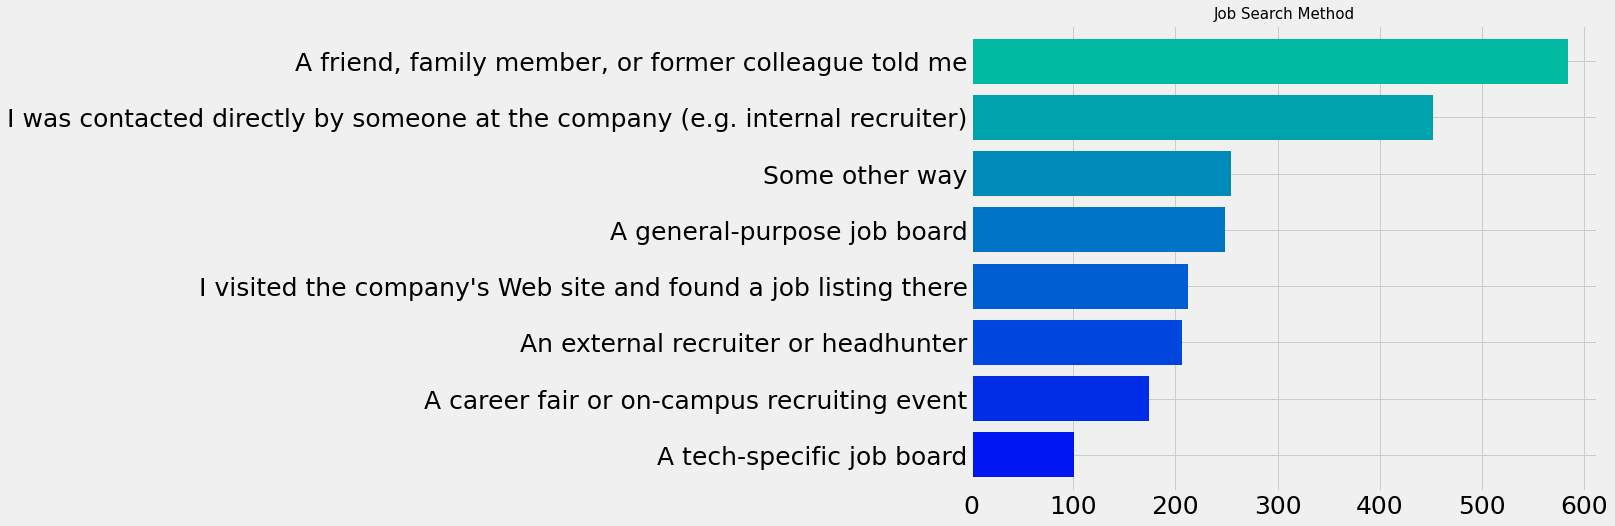

In [110]:
plt.subplots(figsize=(10,8))
scientist.groupby(['EmployerSearchMethod'])['Age'].count().sort_values(ascending=True).plot.barh(width=0.8,color=sns.color_palette('winter',10))
plt.title('Job Search Method',size=15)
plt.ylabel('')
plt.show()

许多数据科学家通过他们的朋友或亲戚了解工作，或者直接与公司联系。

## 在Python和R中最常用什么

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jarod\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jarod\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


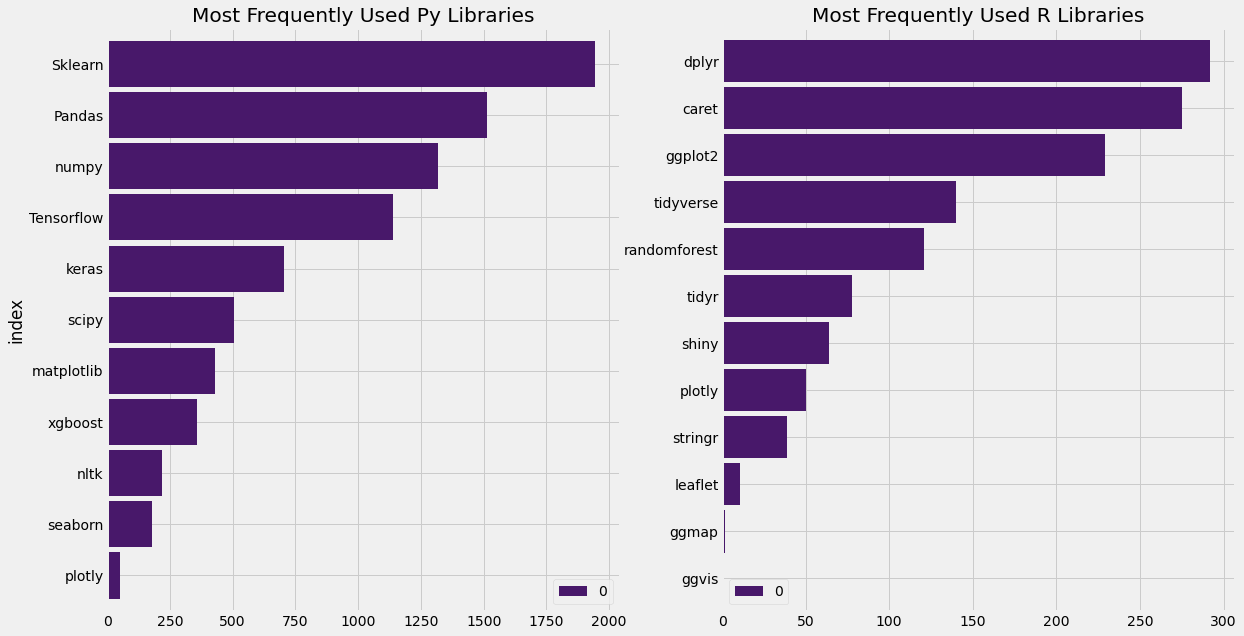

In [6]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
stop_words=set(stopwords.words('english'))
stop_words.update(',',';','!','?','.','(',')','$','#','+',':','...')

free=pd.read_csv('freeformResponses.csv',encoding='ISO-8859-1')
library=free['WorkLibrariesFreeForm'].dropna().apply(nltk.word_tokenize)
lib=[]
for i in library:
    lib.extend(i)
lib=pd.Series(lib)
lib=([i for i in lib.str.lower() if i not in stop_words])
lib=pd.Series(lib)
lib=lib.value_counts().reset_index()
lib.loc[lib['index'].str.contains('Pandas|pandas|panda'),'index']='Pandas'
lib.loc[lib['index'].str.contains('Tensorflow|tensorflow|tf|tensor'),'index']='Tensorflow'
lib.loc[lib['index'].str.contains('Scikit|scikit|sklearn'),'index']='Sklearn'
lib=lib.groupby('index')[0].sum().sort_values(ascending=False).to_frame()
R_packages=['dplyr','tidyr','ggplot2','caret','randomforest','shiny','R markdown','ggmap','leaflet','ggvis','stringr','tidyverse','plotly']
Py_packages=['Pandas','Tensorflow','Sklearn','matplotlib','numpy','scipy','seaborn','keras','xgboost','nltk','plotly']
f,ax=plt.subplots(1,2,figsize=(18,10))
lib[lib.index.isin(Py_packages)].sort_values(by=0,ascending=True).plot.barh(ax=ax[0],width=0.9,color=sns.color_palette('viridis',15))
ax[0].set_title('Most Frequently Used Py Libraries')
lib[lib.index.isin(R_packages)].sort_values(by=0,ascending=True).plot.barh(ax=ax[1],width=0.9,color=sns.color_palette('viridis',15))
ax[1].set_title('Most Frequently Used R Libraries')
ax[1].set_ylabel('')
plt.show()